In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
cars = pd.read_csv('cars.csv')

In [3]:
cars.head()

,Unnamed: 0,StockType,Title,Exterior,Interior,Transmission,Drivetrain,Price,Mileage
0,0,USED,2004 Mazda RX-8 Sport Automatic,Gray,Black,Automatic,RWD,3999,105793
1,1,USED,2016 Mercedes-Benz AMG GT AMG GT S,Blue,Other,Automatic,RWD,68500,32114
2,2,USED,2017 INFINITI Q60 3.0T Premium,Gray,Gray,Automatic,RWD,22500,56419
3,3,USED,1992 Honda Prelude S,Black,Black,Manual,FWD,2998,261237
4,4,USED,2016 Scion tC w/ sunroof,White,Gray,Other / Unknown,FWD,14000,41690


In [4]:
cars = cars.drop('Unnamed: 0', axis=1)

In [5]:
cars['Year'] = cars['Title'].apply(lambda x: x.split(' ', 2)[0])
cars['Make'] = cars['Title'].apply(lambda x: x.split(' ', 2)[1])
cars['Mileage'] = cars['Mileage'].apply(lambda x: 0 if x == 'MSRP' else x)

In [6]:
cars['Model'] = cars[['Title', 'Year', 'Make']].apply(lambda x: x[0].replace(f'{x[1]} {x[2]} ', ''), axis=1)

In [7]:
cars['Year'] = pd.to_numeric(cars['Year'])

In [8]:
cars['Mileage'] = pd.to_numeric(cars['Mileage'], errors='coerce')

In [9]:
cars = cars.dropna(how='any', axis=0)

In [10]:
len(cars)

9777

In [11]:
cars['Price'] = pd.to_numeric(cars['Price'])

In [12]:
ext_colors = list(cars['Exterior'].unique())

In [13]:
int_colors = list(cars['Interior'].unique())

In [14]:
ext_key = {ext_colors[i]: i for i in range(len(ext_colors))}
ext_key_inv = {v: k for v, k in ext_key.items()}

int_key = {int_colors[i]: i for i in range(len(int_colors))}
int_key_inv = {v: k for v, k in int_key.items()}

In [15]:
cars['ext_code'] = cars['Exterior'].map(ext_key)
cars['int_code'] = cars['Interior'].map(int_key)

In [16]:
cars.corr()

,Price,Mileage,Year,ext_code,int_code
Price,1.000000,-0.300186,0.096336,0.152536,-0.054979
Mileage,-0.300186,1.000000,-0.472857,0.046552,0.040077
Year,0.096336,-0.472857,1.000000,-0.170072,-0.153317
ext_code,0.152536,0.046552,-0.170072,1.000000,-0.052649
int_code,-0.054979,0.040077,-0.153317,-0.052649,1.000000


In [17]:
makes = list(cars.Make.unique())

Mazda
	83 cars with values > 23000
	43 cars with values < 23000


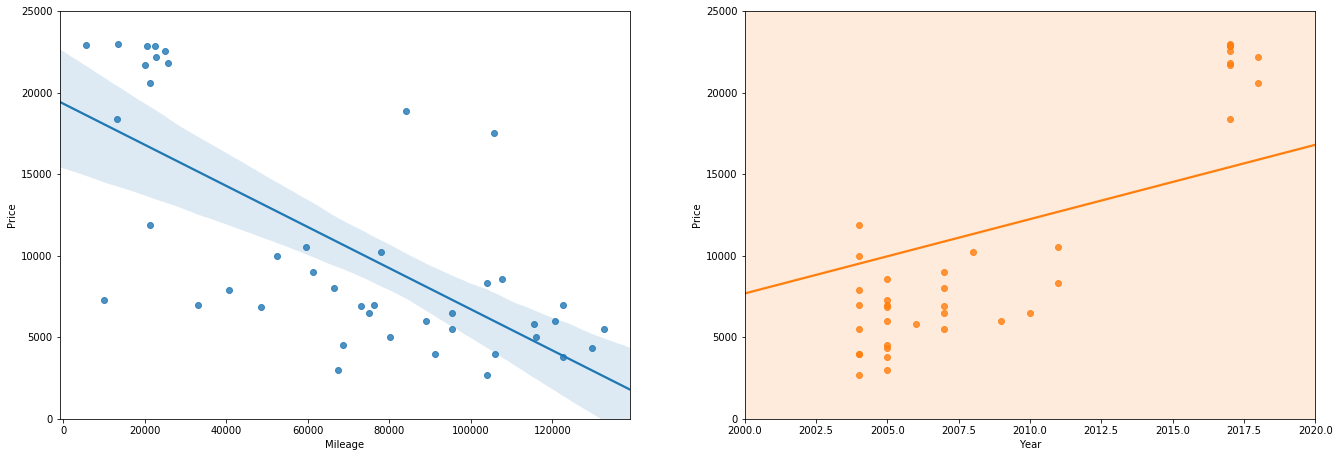

Mercedes-Benz
	536 cars with values > 23000
	136 cars with values < 23000


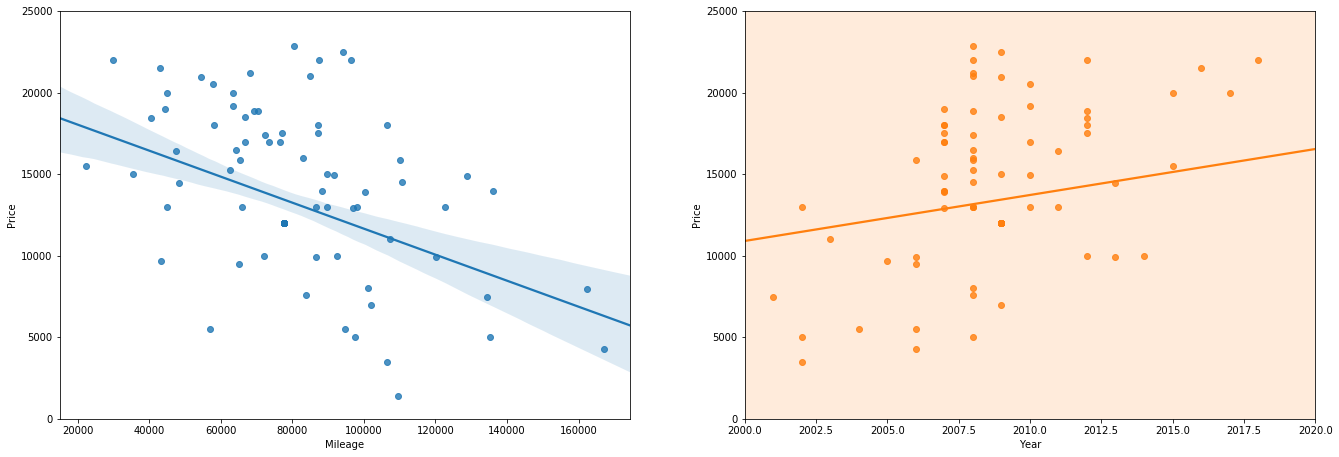

INFINITI
	138 cars with values > 23000
	105 cars with values < 23000


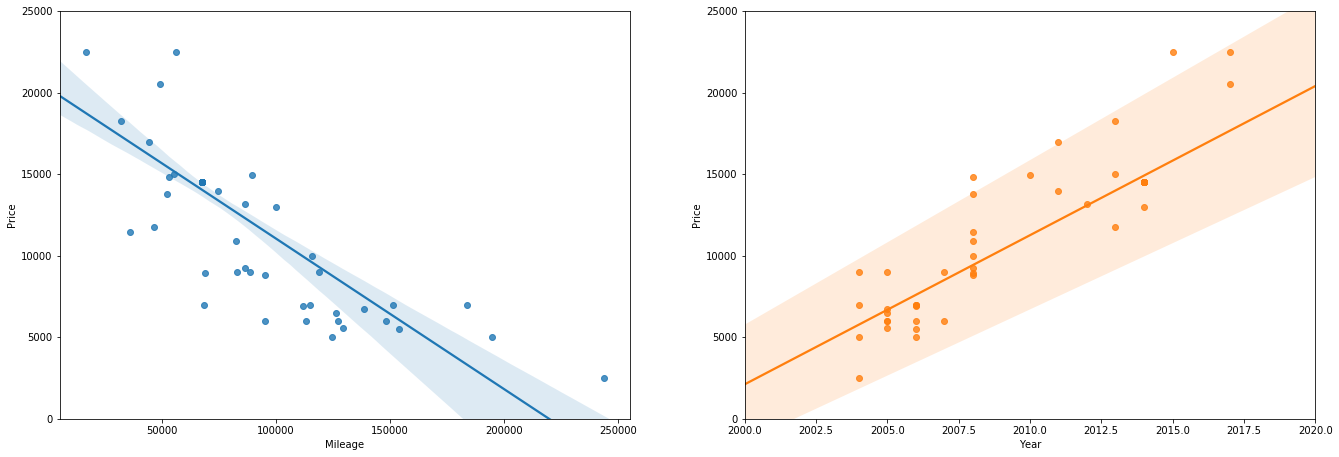

Honda
	67 cars with values > 23000
	324 cars with values < 23000


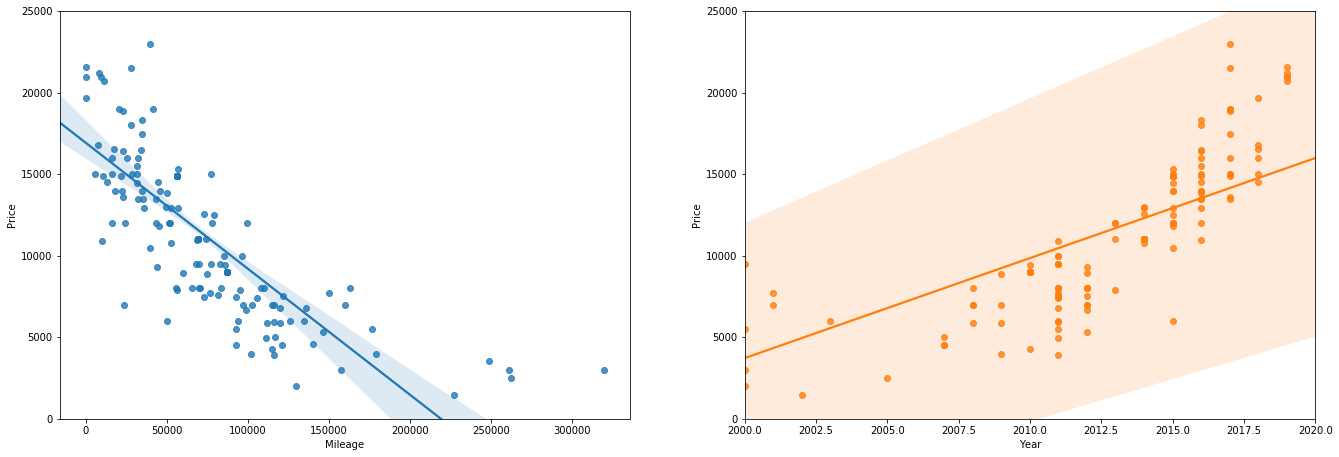

Scion
	1 cars with values > 23000
	499 cars with values < 23000


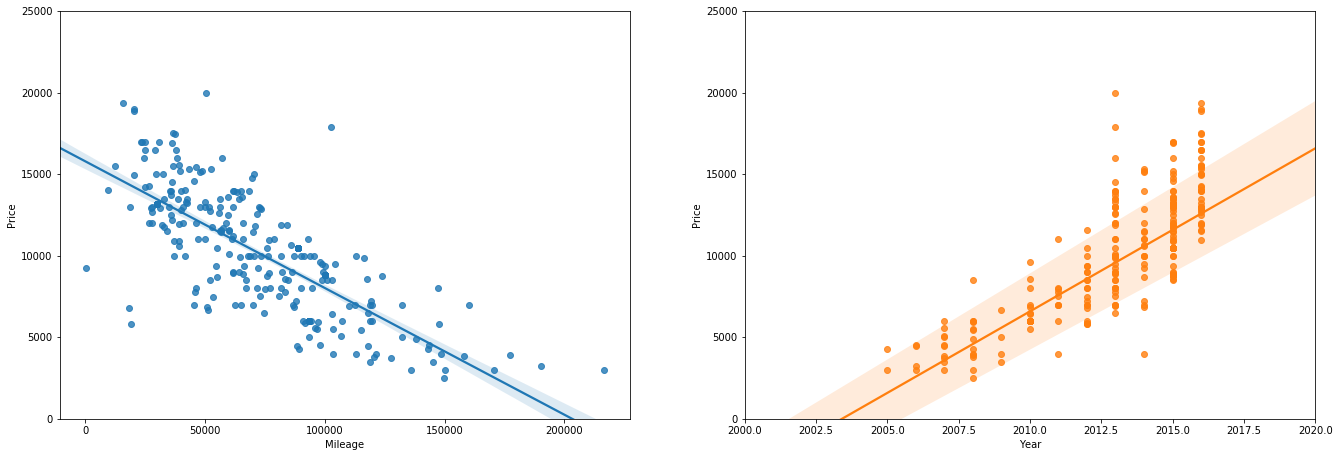

Audi
	423 cars with values > 23000
	135 cars with values < 23000


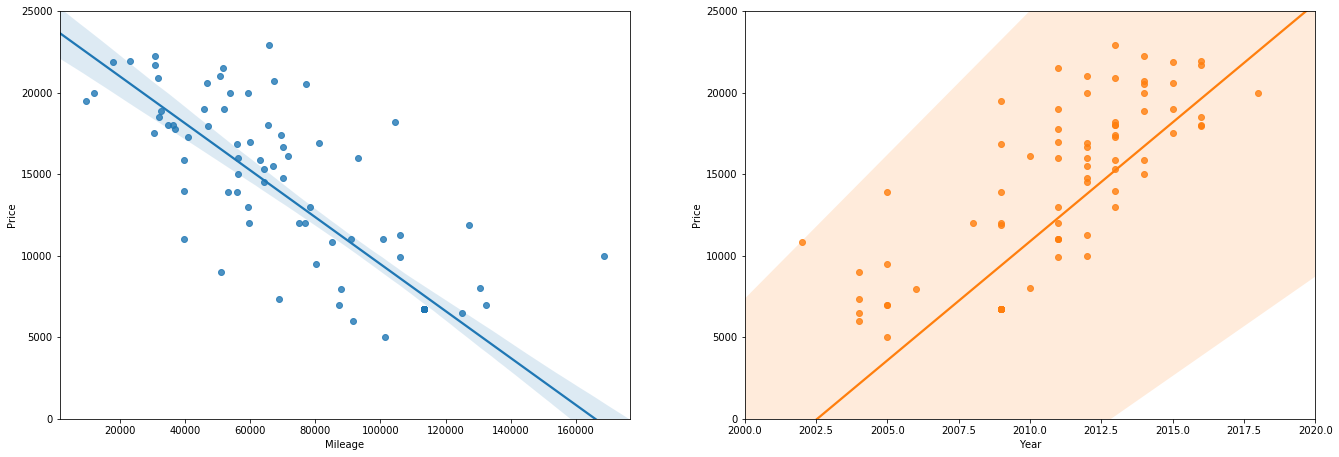

smart
	0 cars with values > 23000
	118 cars with values < 23000


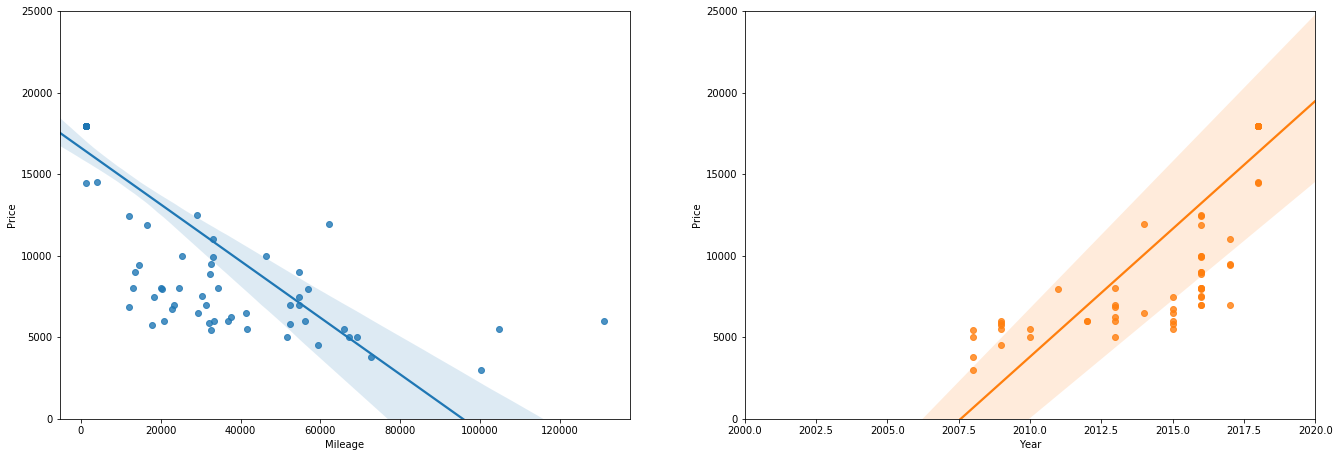

Nissan
	67 cars with values > 23000
	102 cars with values < 23000


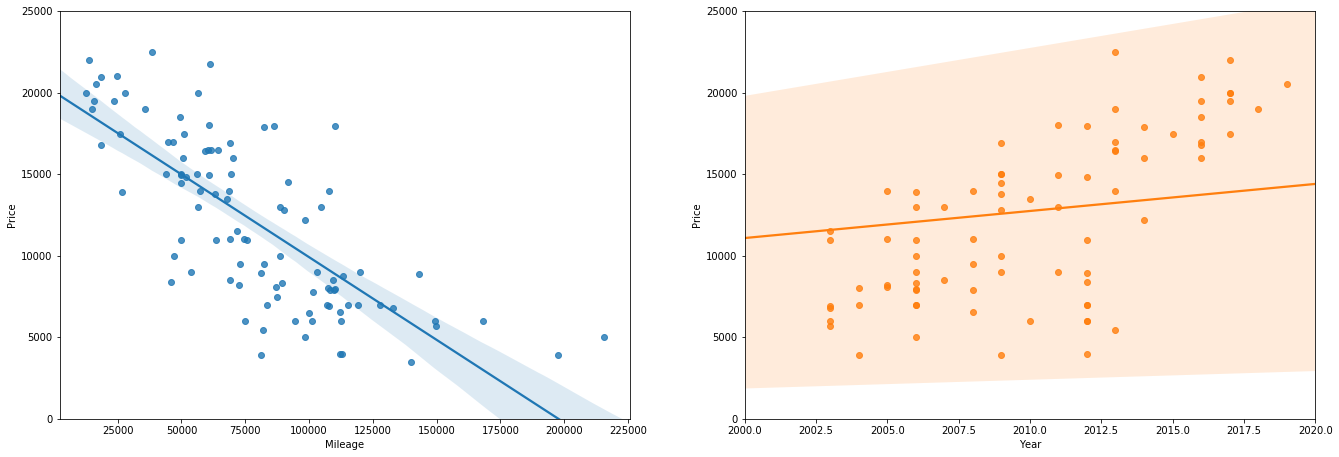

Chrysler
	0 cars with values > 23000
	100 cars with values < 23000


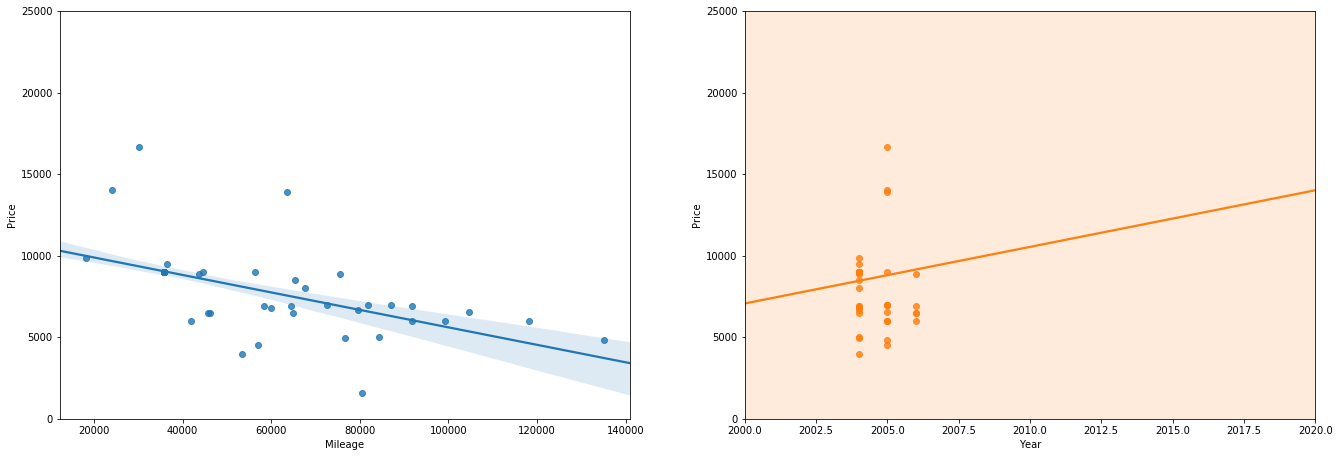

Porsche
	268 cars with values > 23000
	21 cars with values < 23000


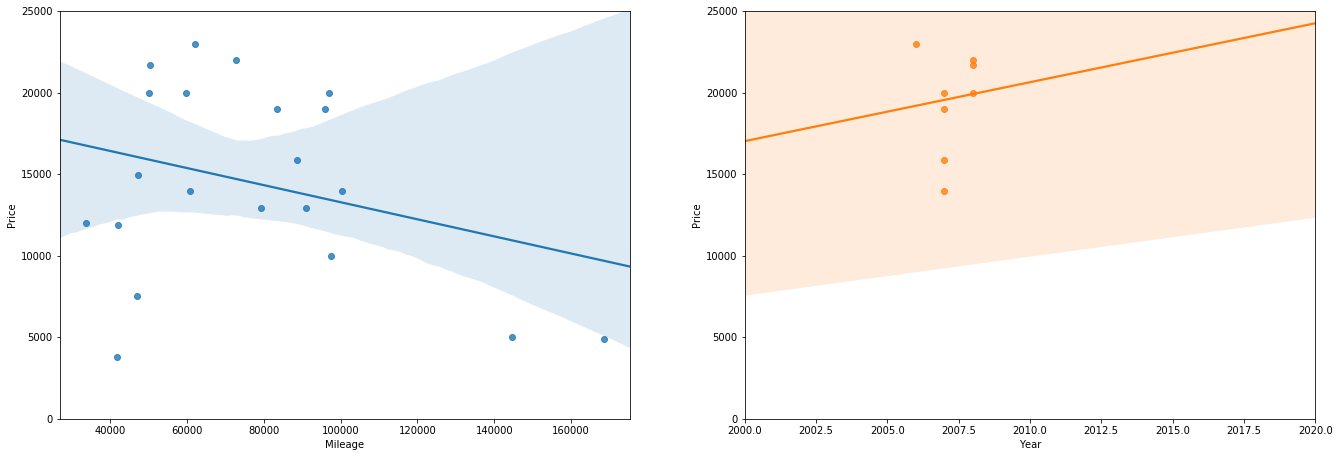

Ford
	646 cars with values > 23000
	113 cars with values < 23000


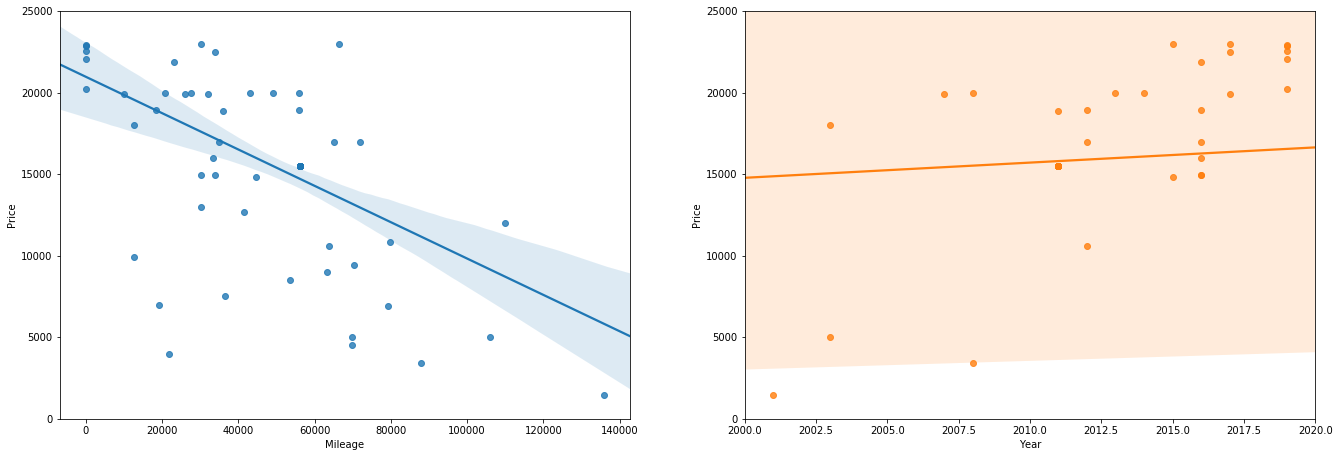

Hyundai
	3 cars with values > 23000
	165 cars with values < 23000


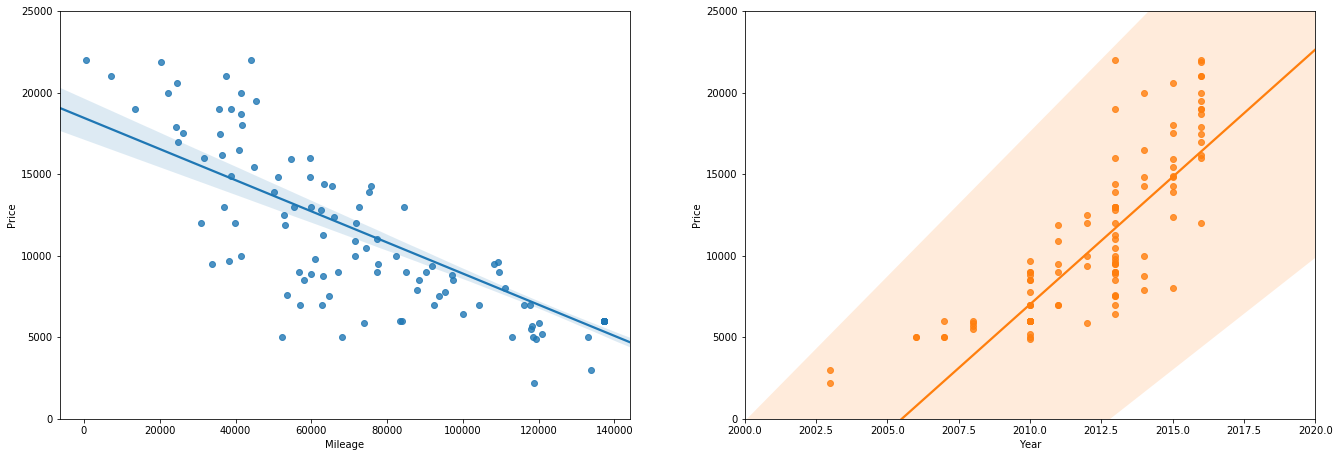

Pontiac
	6 cars with values > 23000
	240 cars with values < 23000


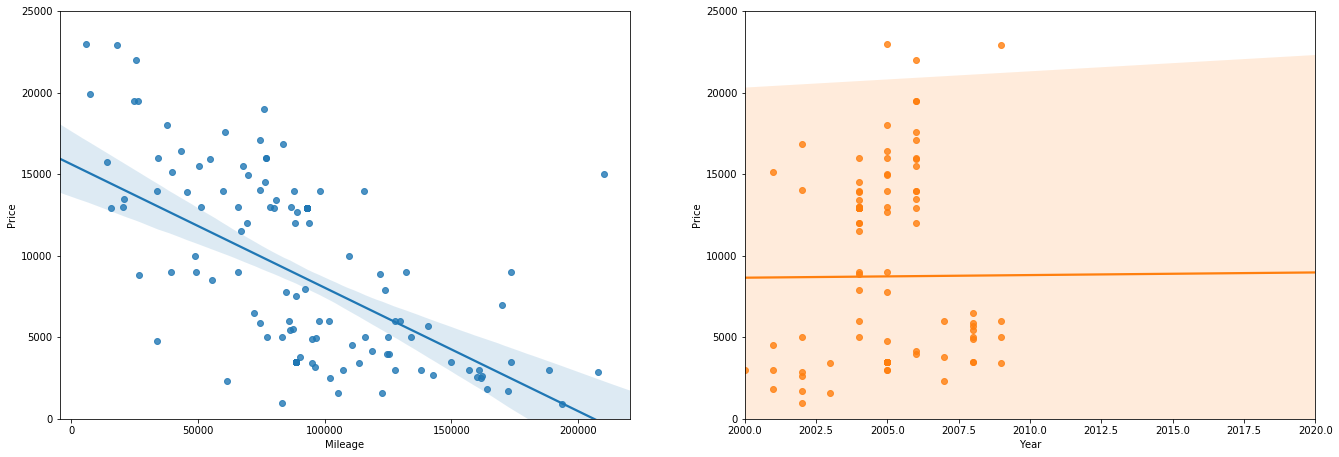

BMW
	759 cars with values > 23000
	625 cars with values < 23000


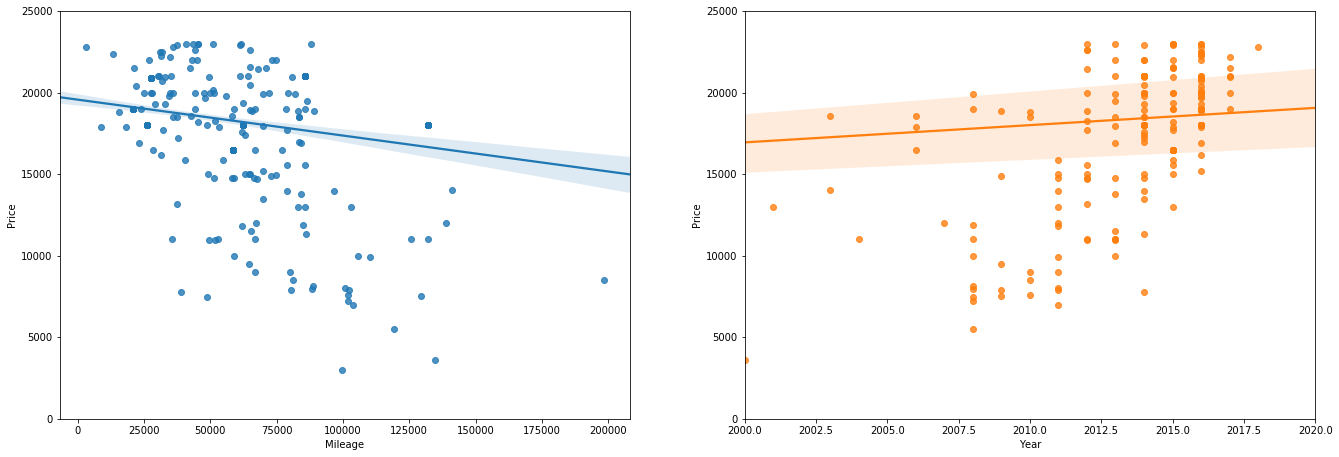

Jaguar
	265 cars with values > 23000
	19 cars with values < 23000


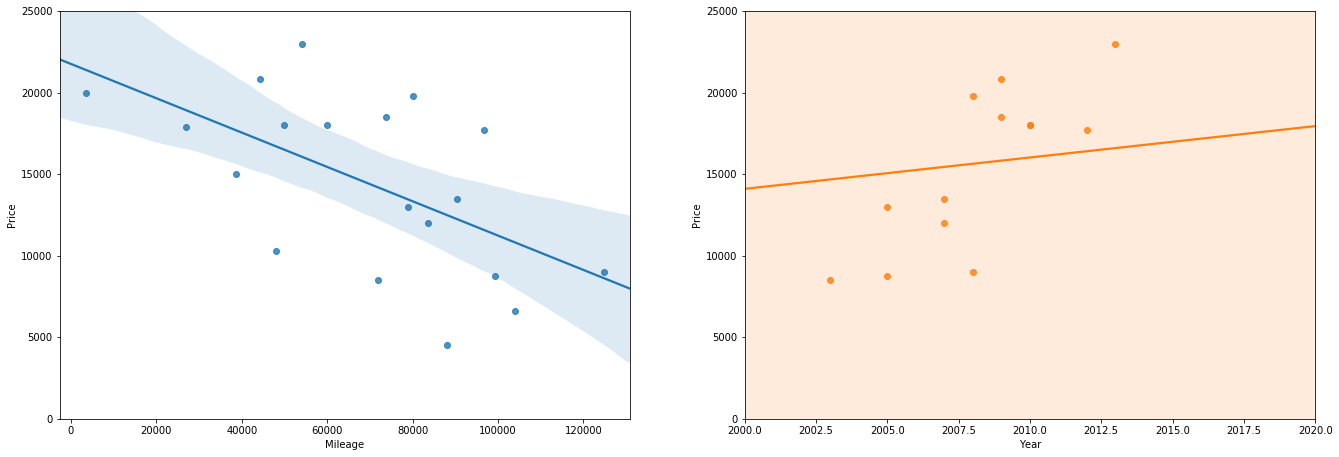

Chevrolet
	465 cars with values > 23000
	545 cars with values < 23000


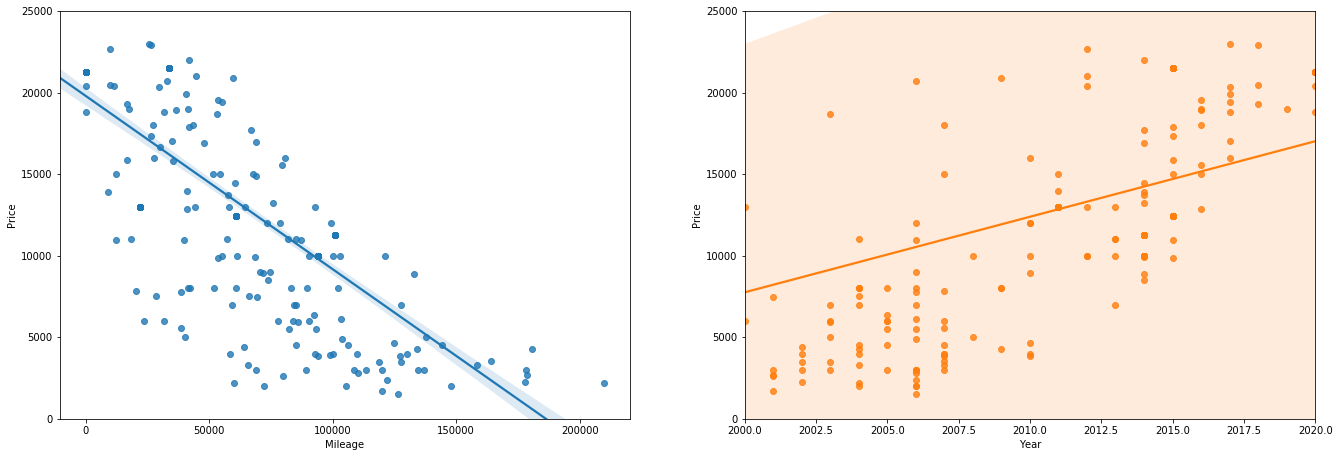

Acura
	104 cars with values > 23000
	24 cars with values < 23000


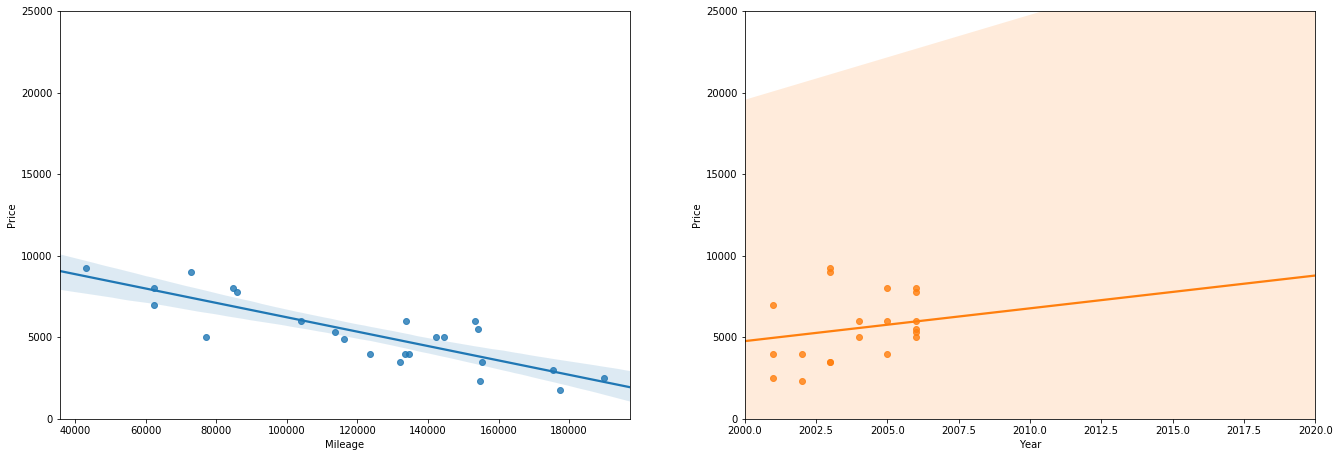

Volkswagen
	0 cars with values > 23000
	17 cars with values < 23000


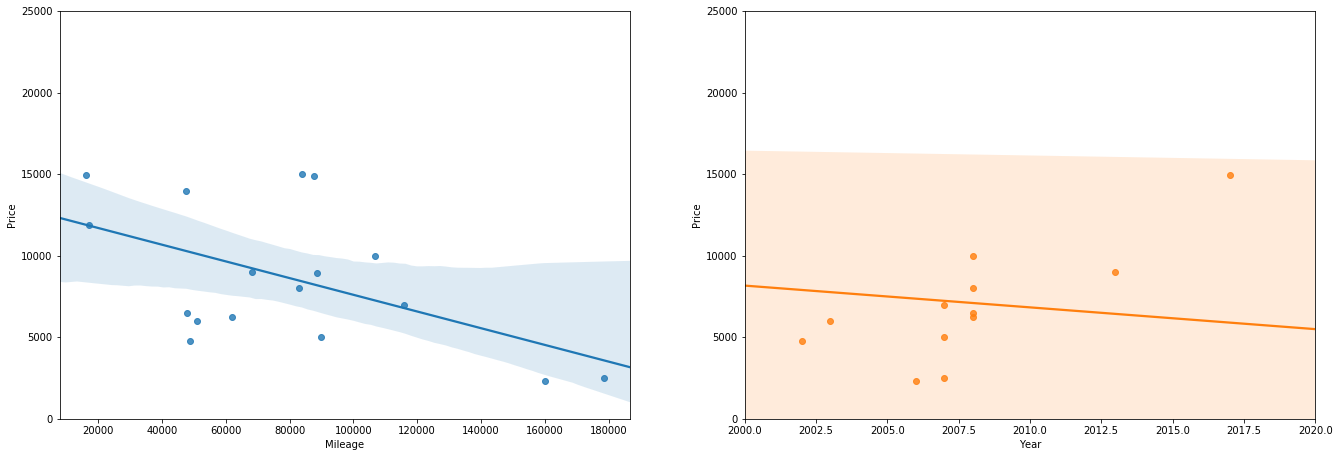

Lexus
	386 cars with values > 23000
	16 cars with values < 23000


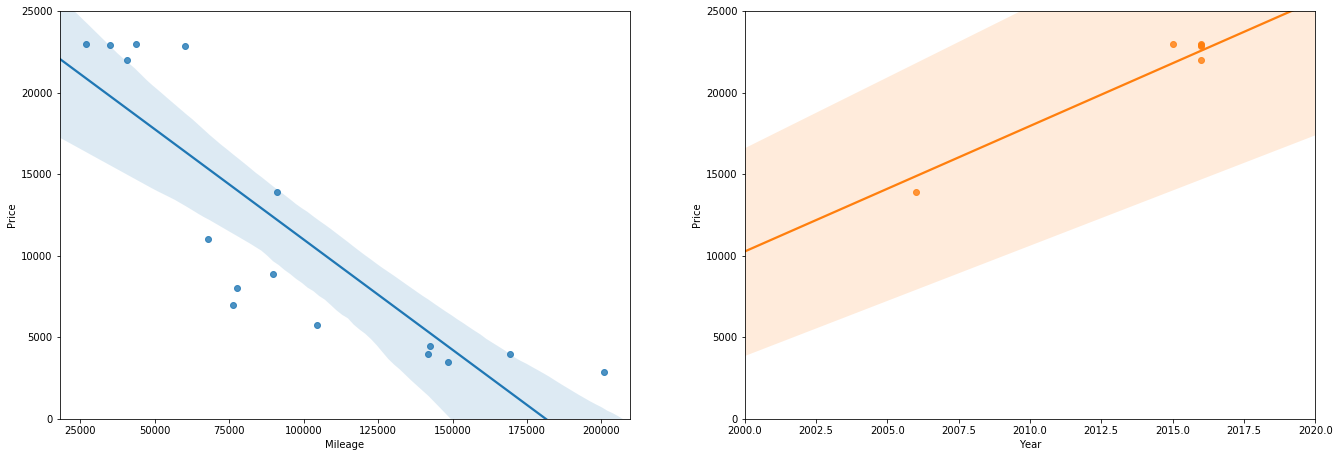

Aston
	103 cars with values > 23000
	0 cars with values < 23000


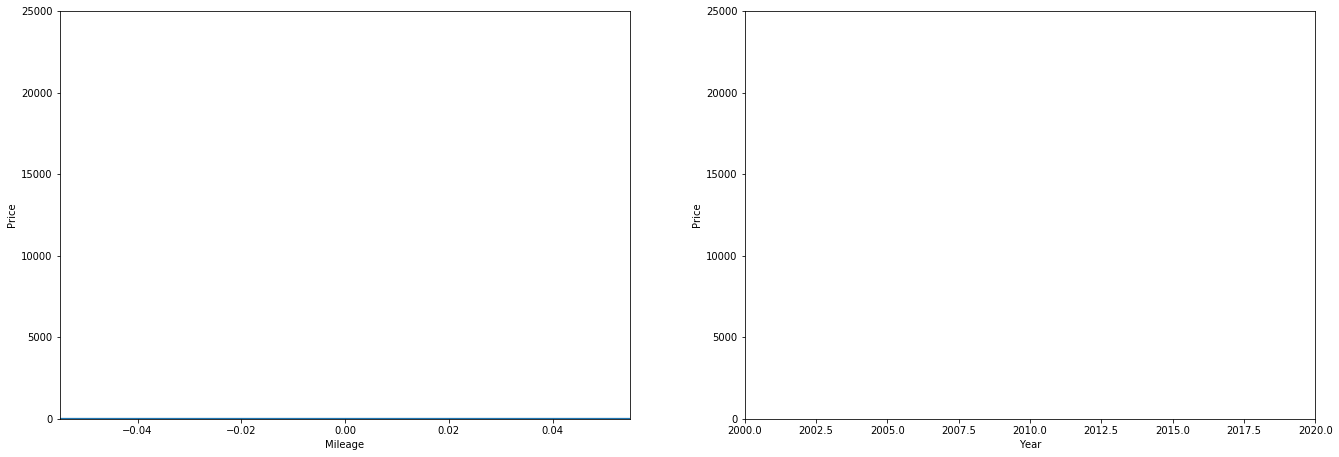

Lincoln
	0 cars with values > 23000
	4 cars with values < 23000


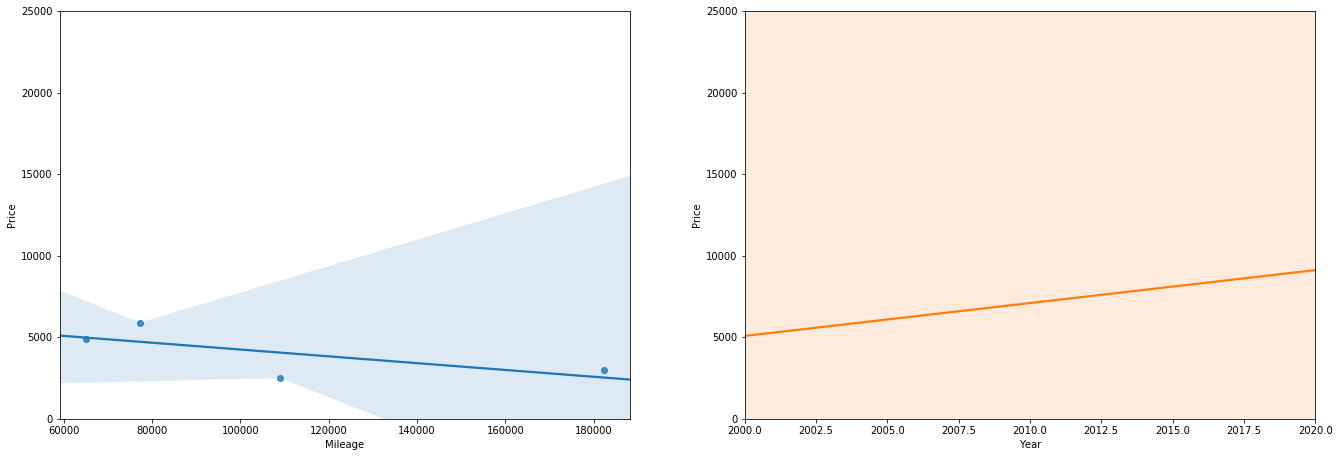

Subaru
	10 cars with values > 23000
	110 cars with values < 23000


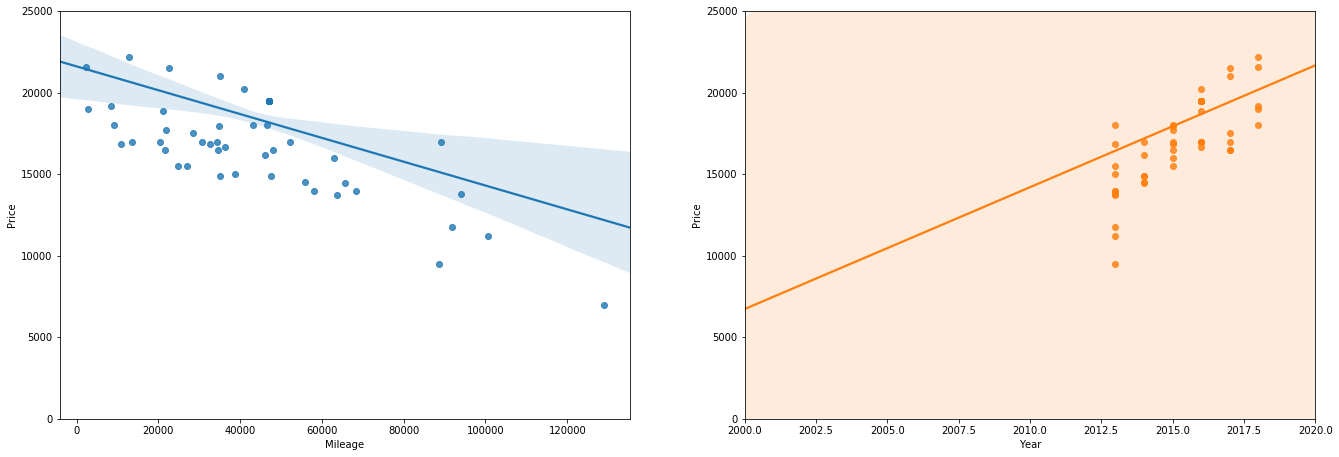

Lotus
	27 cars with values > 23000
	0 cars with values < 23000


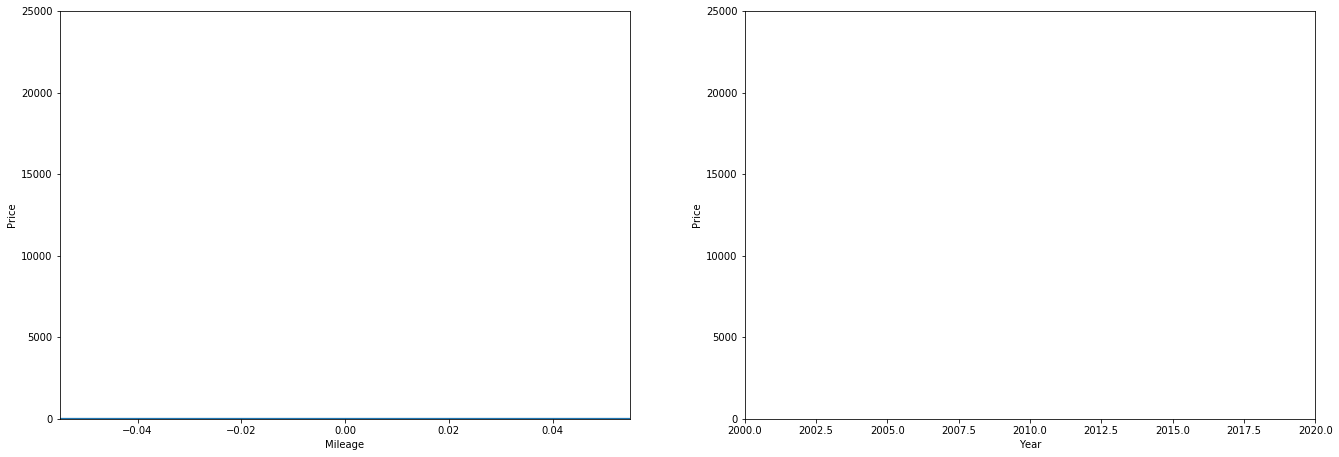

Toyota
	151 cars with values > 23000
	130 cars with values < 23000


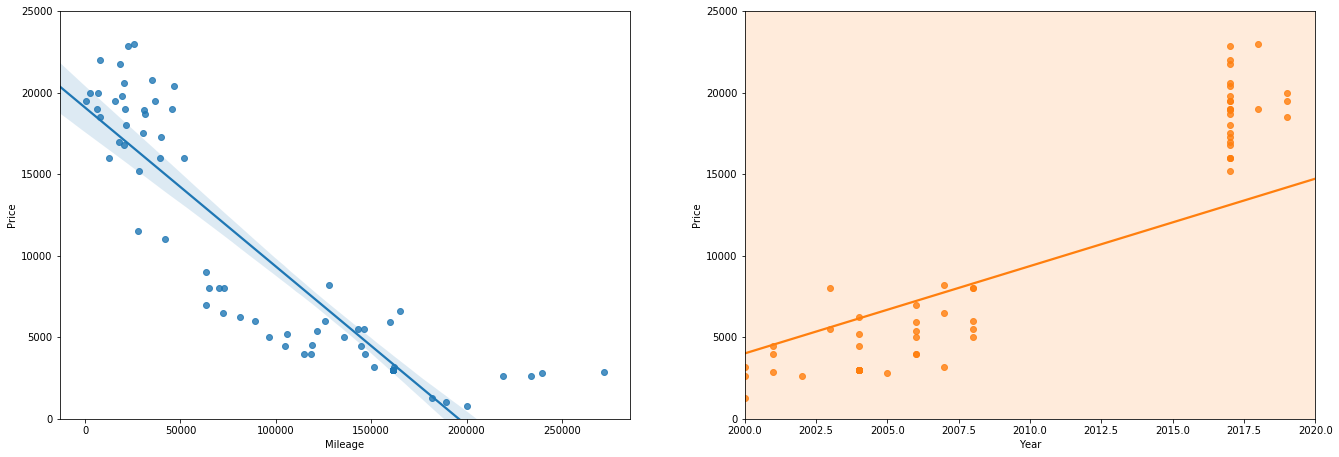

Ferrari
	156 cars with values > 23000
	1 cars with values < 23000


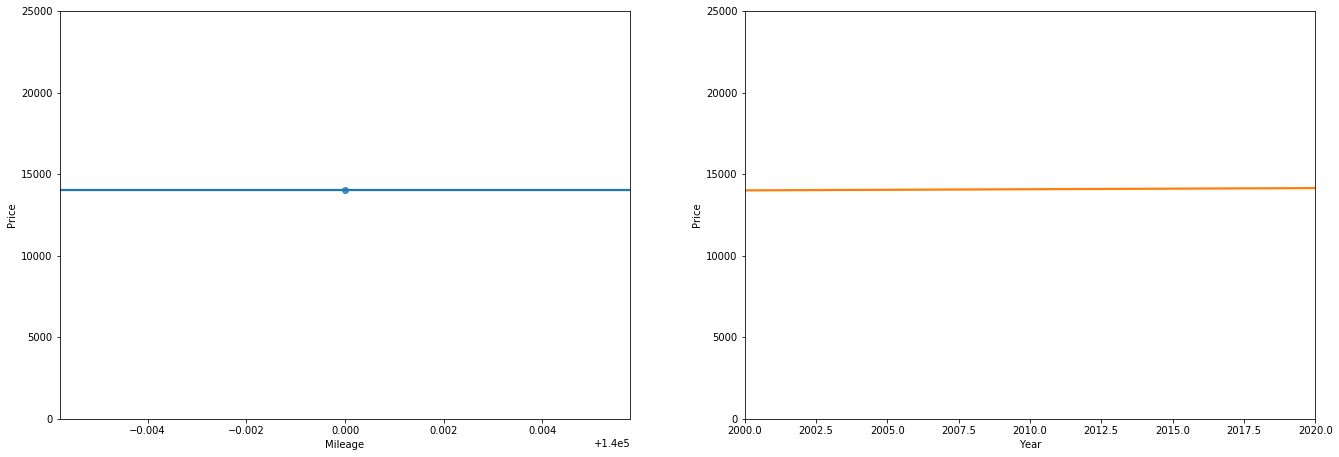

Bugatti
	1 cars with values > 23000
	0 cars with values < 23000


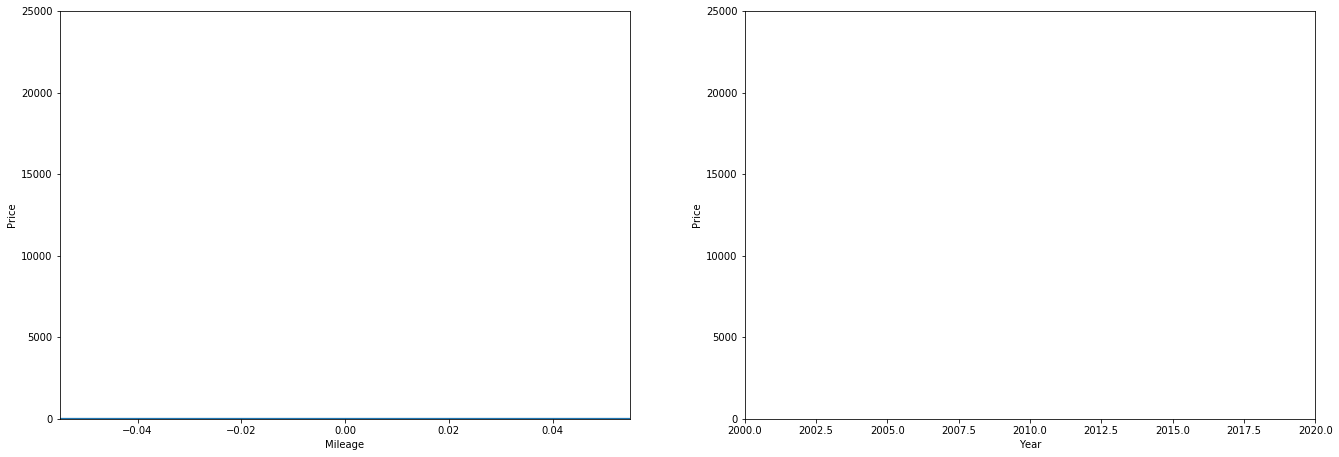

Cadillac
	159 cars with values > 23000
	56 cars with values < 23000


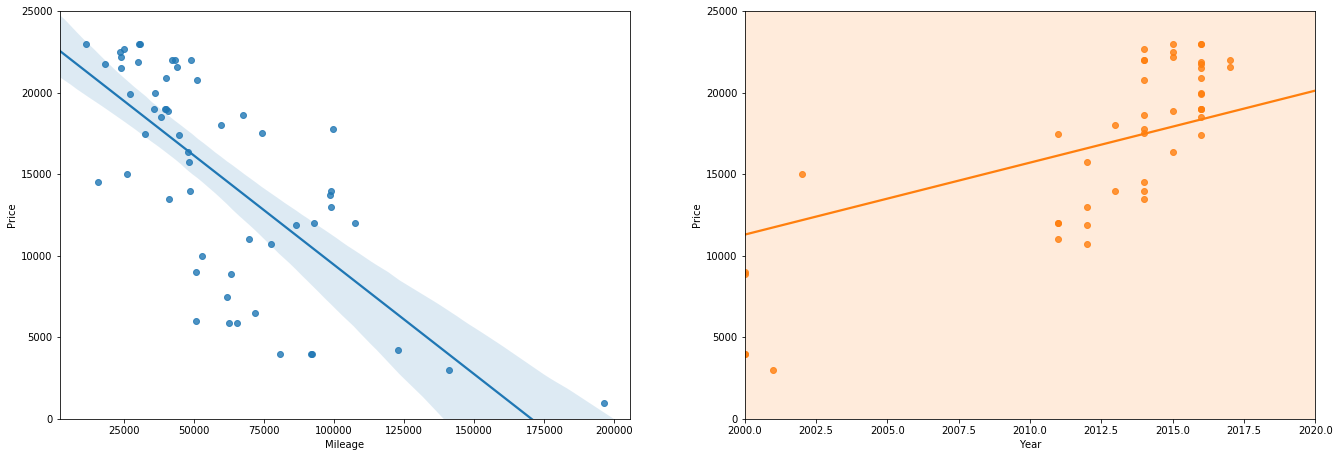

Lamborghini
	80 cars with values > 23000
	0 cars with values < 23000


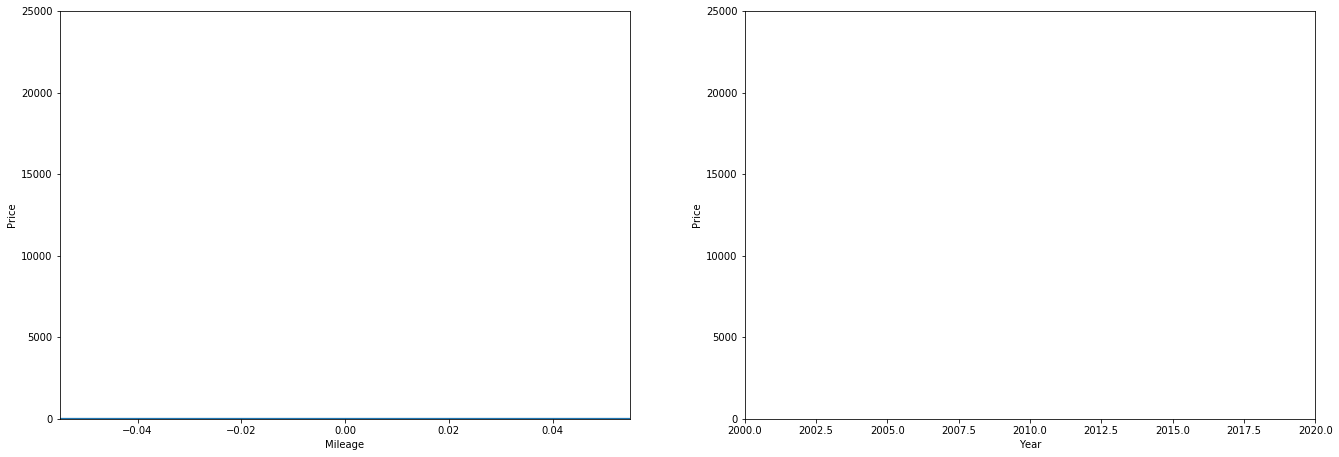

Mitsubishi
	2 cars with values > 23000
	128 cars with values < 23000


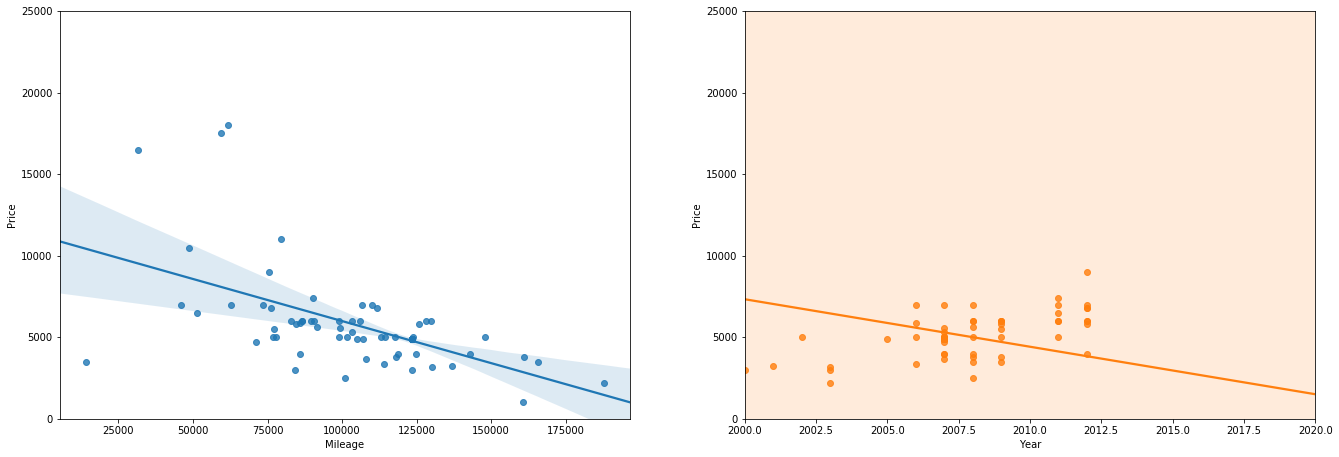

Maserati
	264 cars with values > 23000
	5 cars with values < 23000


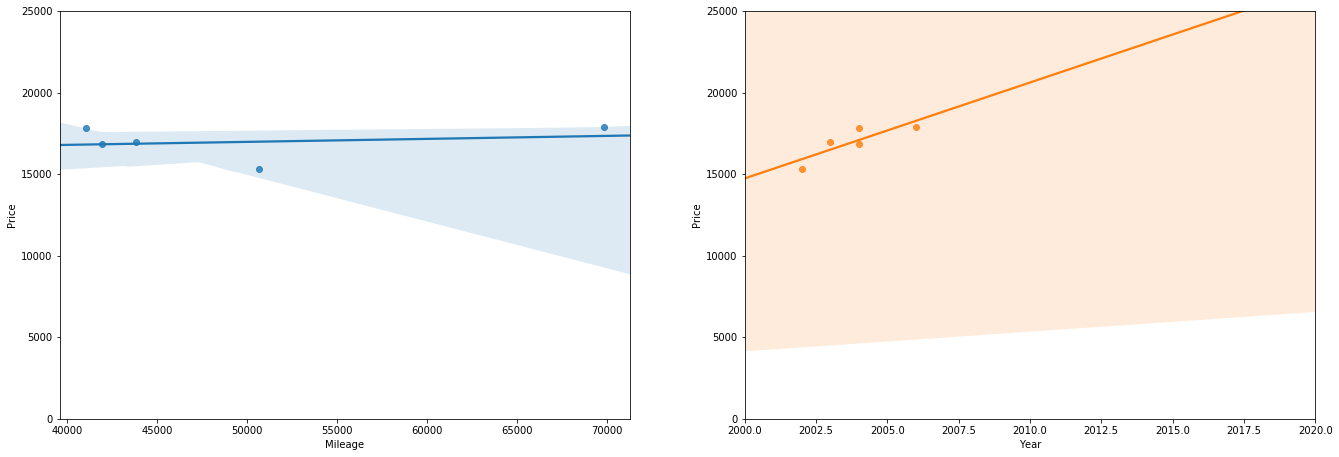

Bentley
	116 cars with values > 23000
	0 cars with values < 23000


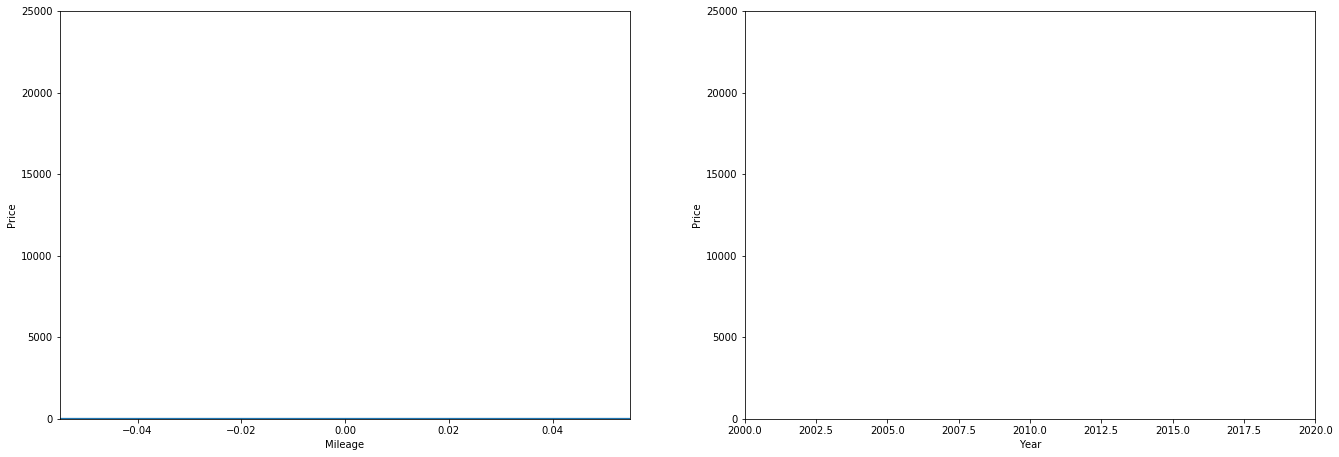

Volvo
	0 cars with values > 23000
	1 cars with values < 23000


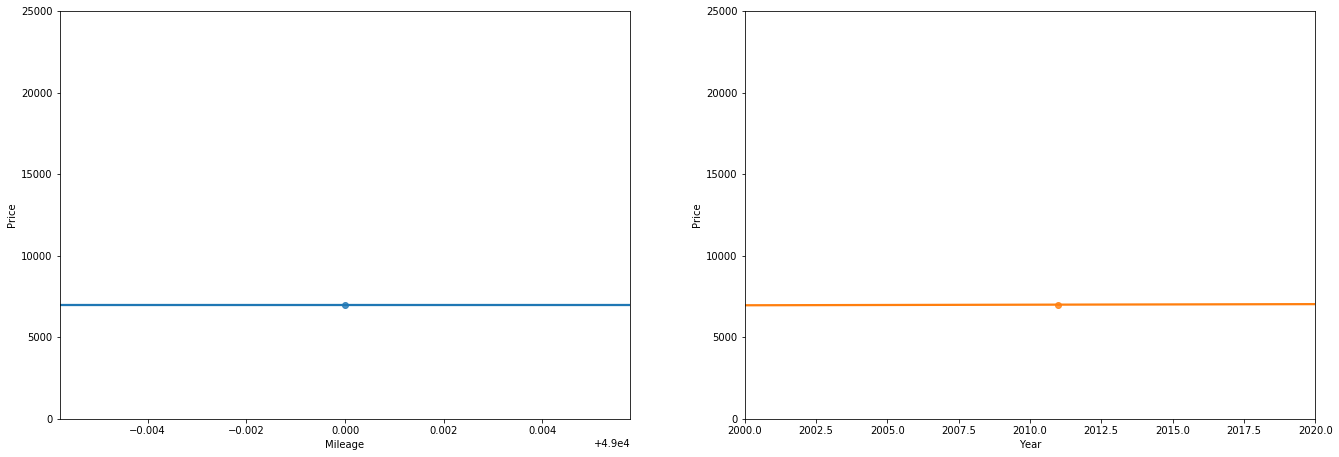

Dodge
	279 cars with values > 23000
	133 cars with values < 23000


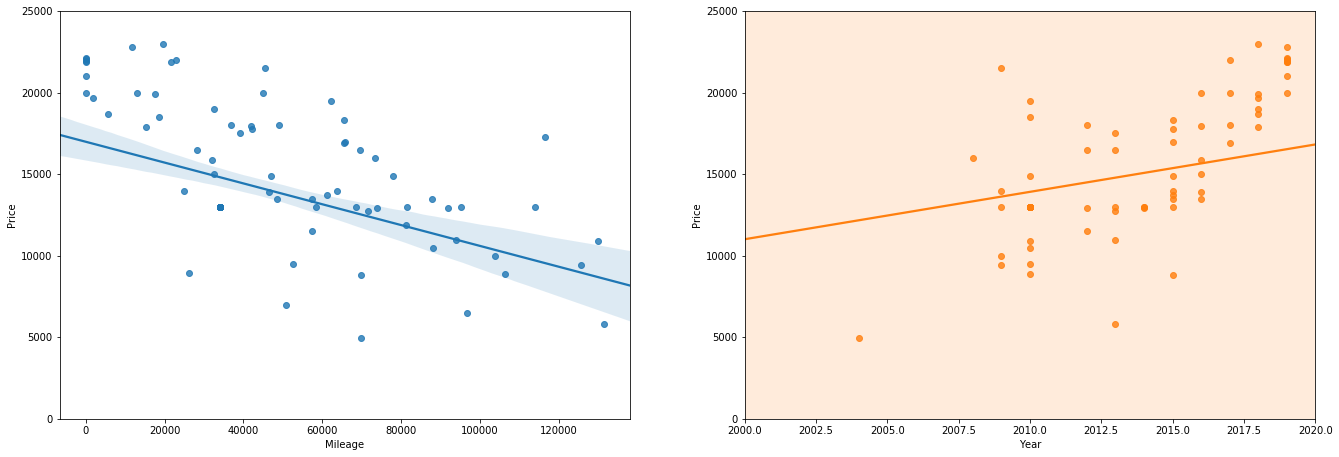

Alfa
	8 cars with values > 23000
	1 cars with values < 23000


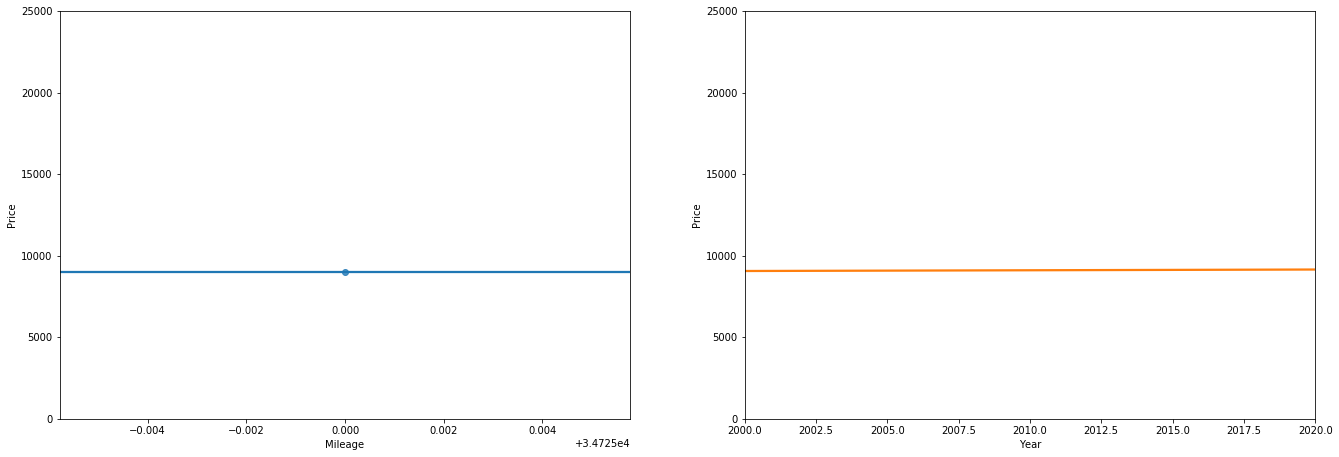

Buick
	4 cars with values > 23000
	85 cars with values < 23000


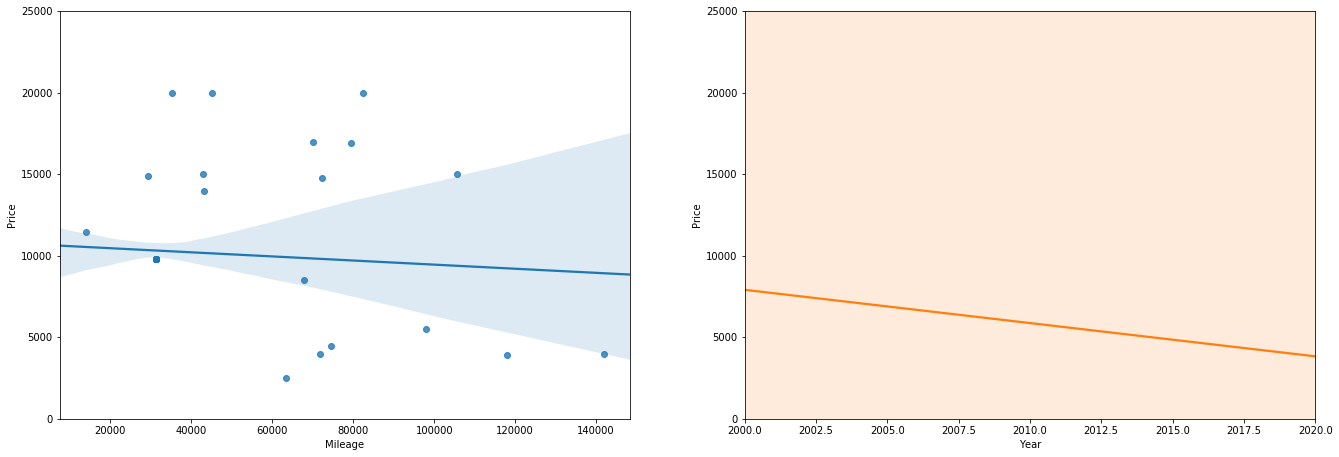

Oldsmobile
	1 cars with values > 23000
	8 cars with values < 23000


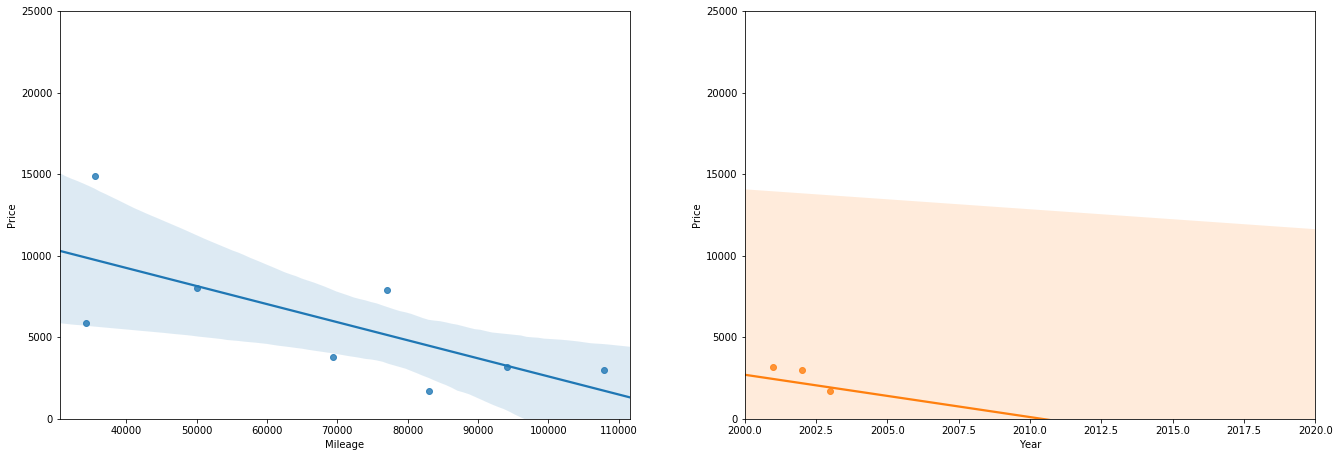

Mercury
	0 cars with values > 23000
	6 cars with values < 23000


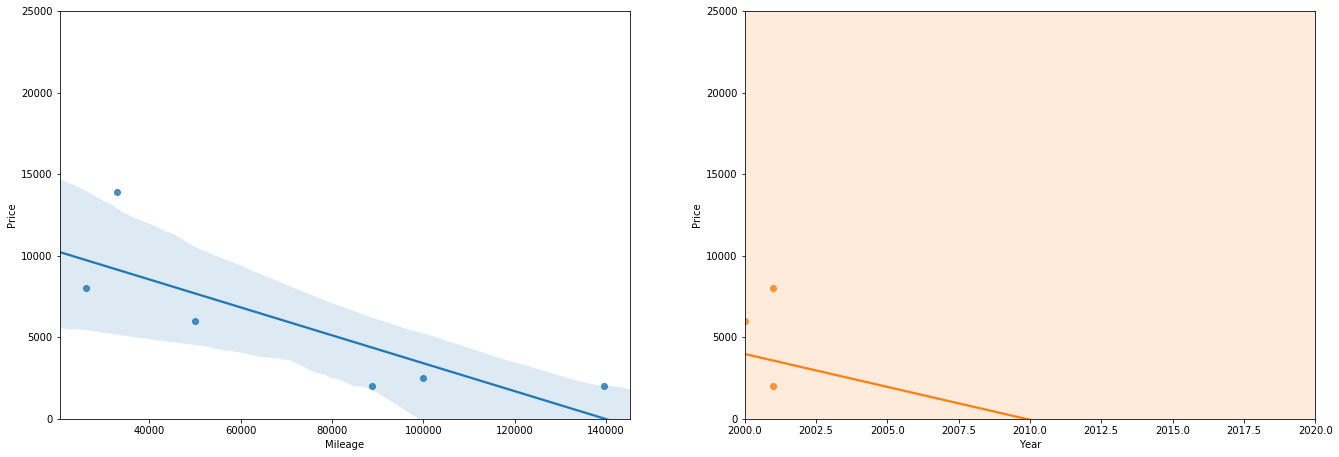

MINI
	0 cars with values > 23000
	24 cars with values < 23000


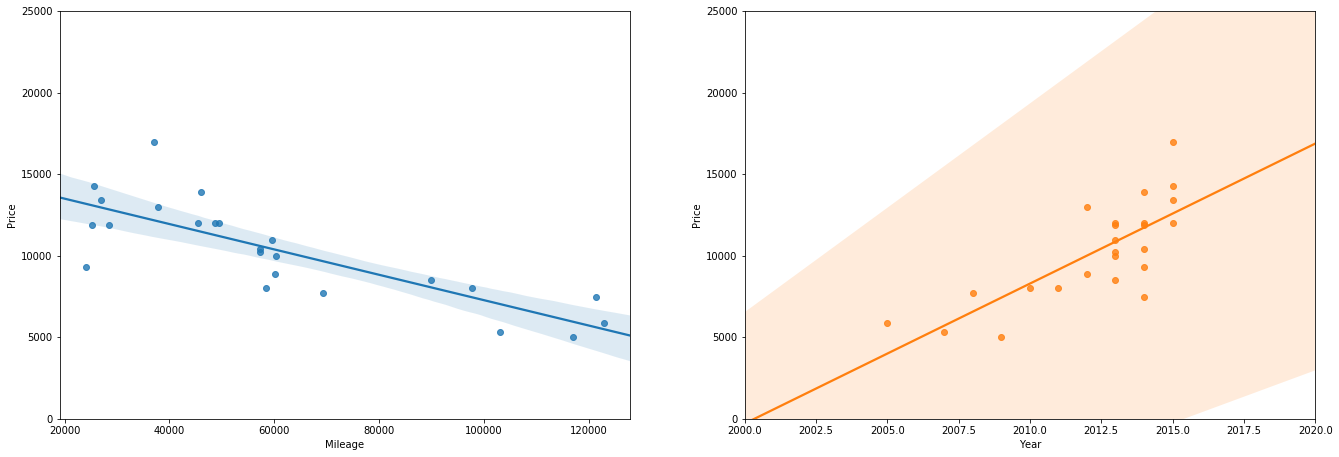

McLaren
	27 cars with values > 23000
	0 cars with values < 23000


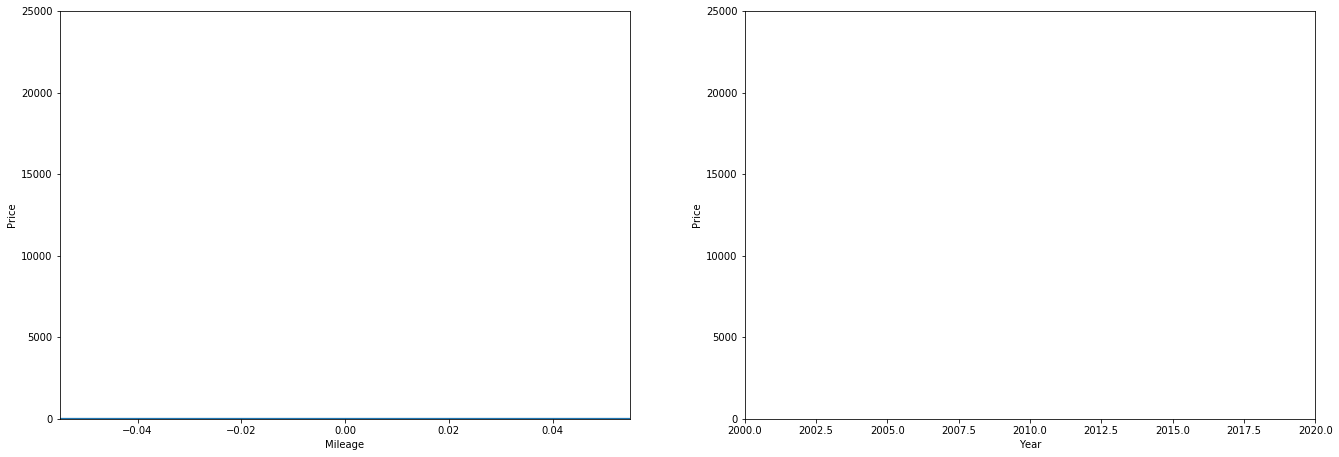

Datsun
	1 cars with values > 23000
	4 cars with values < 23000


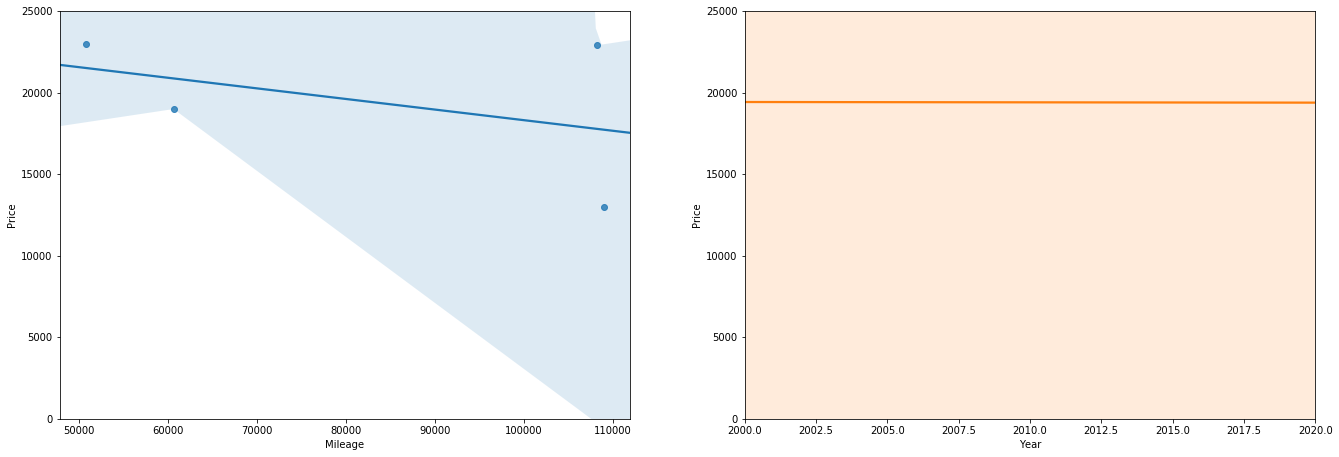

Rolls-Royce
	25 cars with values > 23000
	0 cars with values < 23000


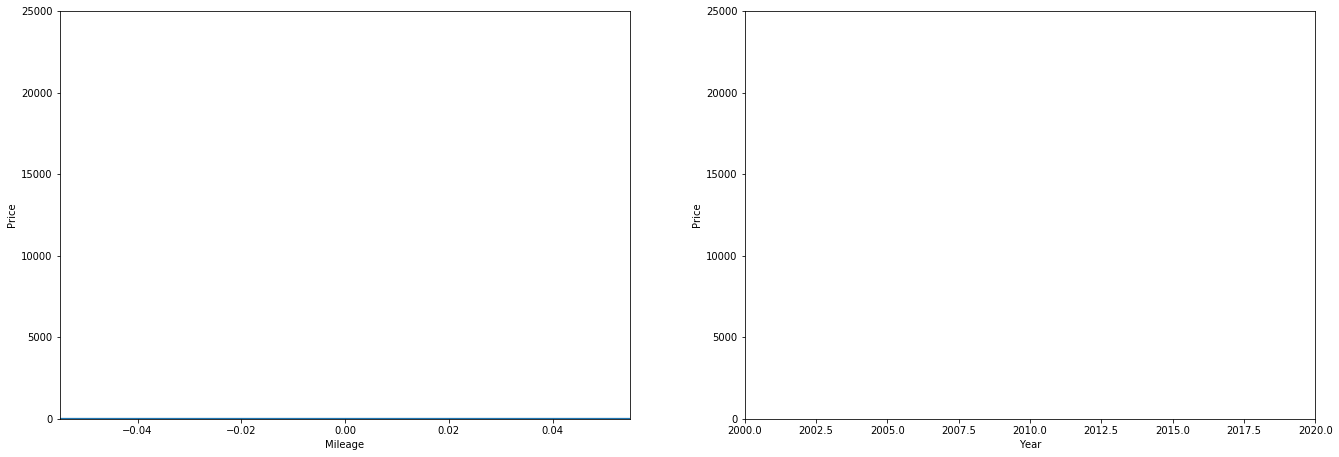

FIAT
	0 cars with values > 23000
	2 cars with values < 23000


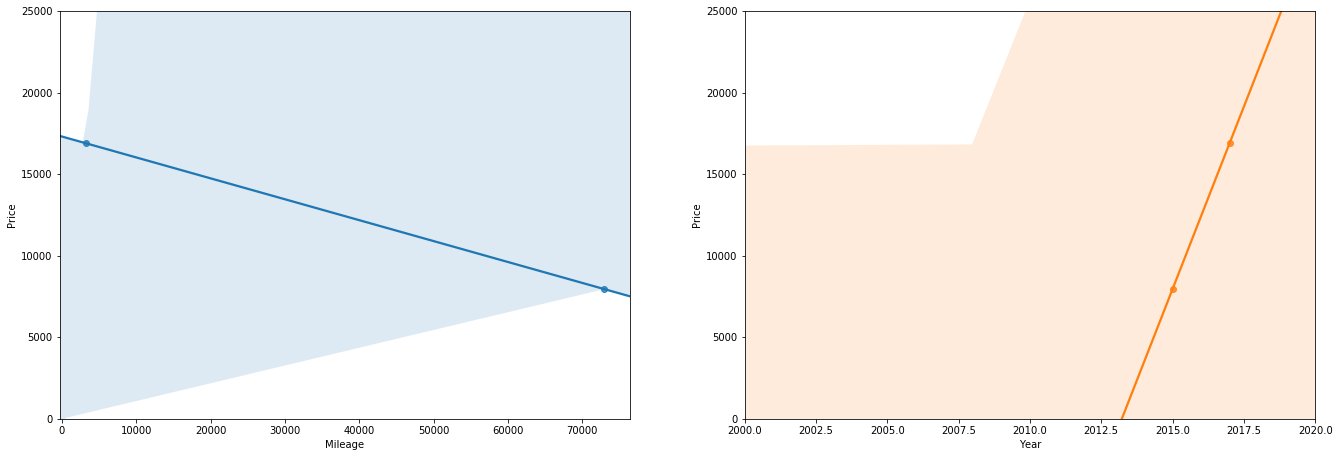

Kia
	0 cars with values > 23000
	18 cars with values < 23000


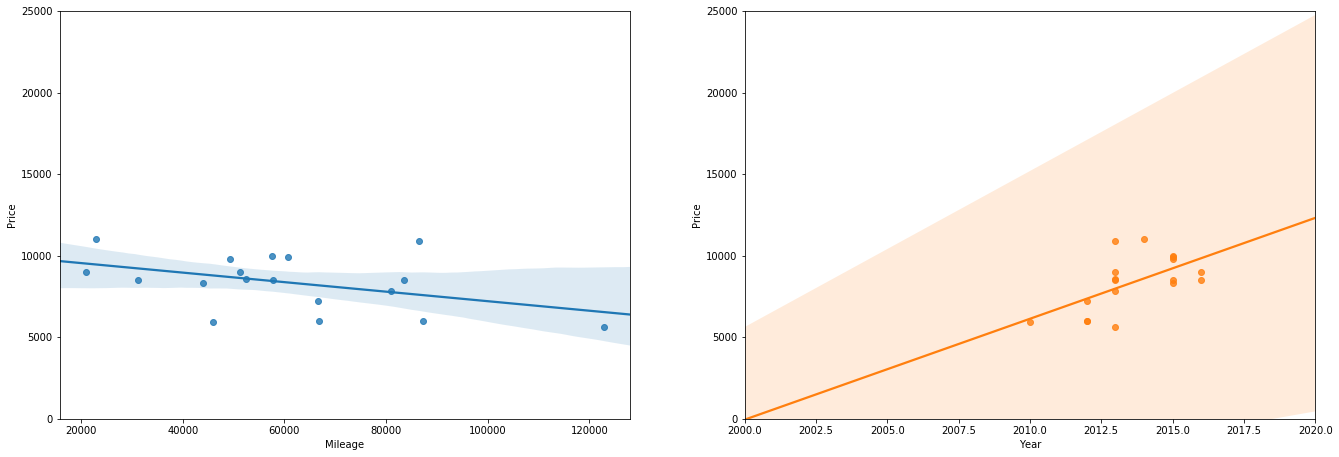

Saturn
	0 cars with values > 23000
	10 cars with values < 23000


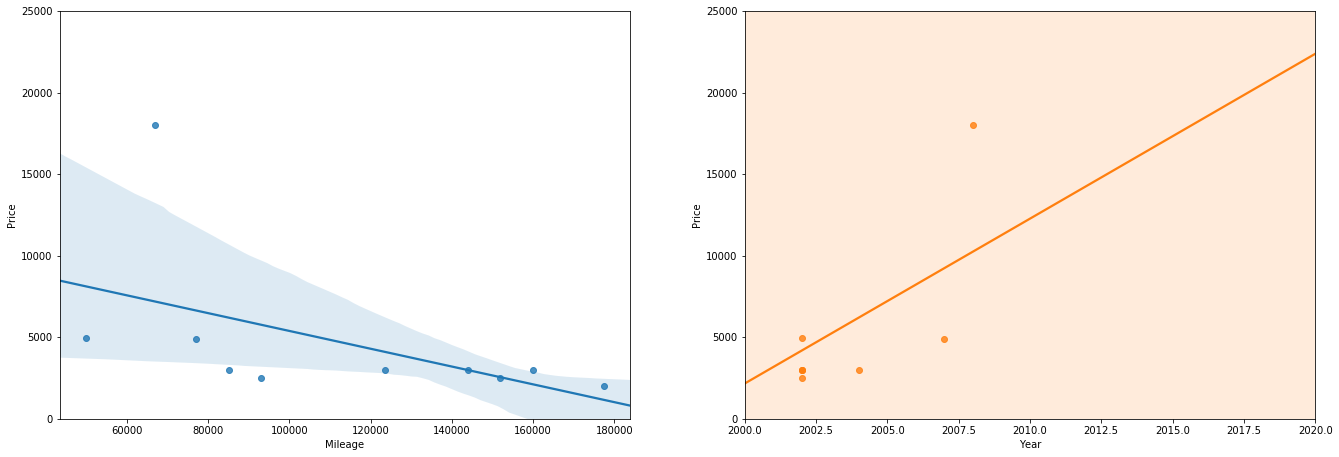

Delorean
	1 cars with values > 23000
	0 cars with values < 23000


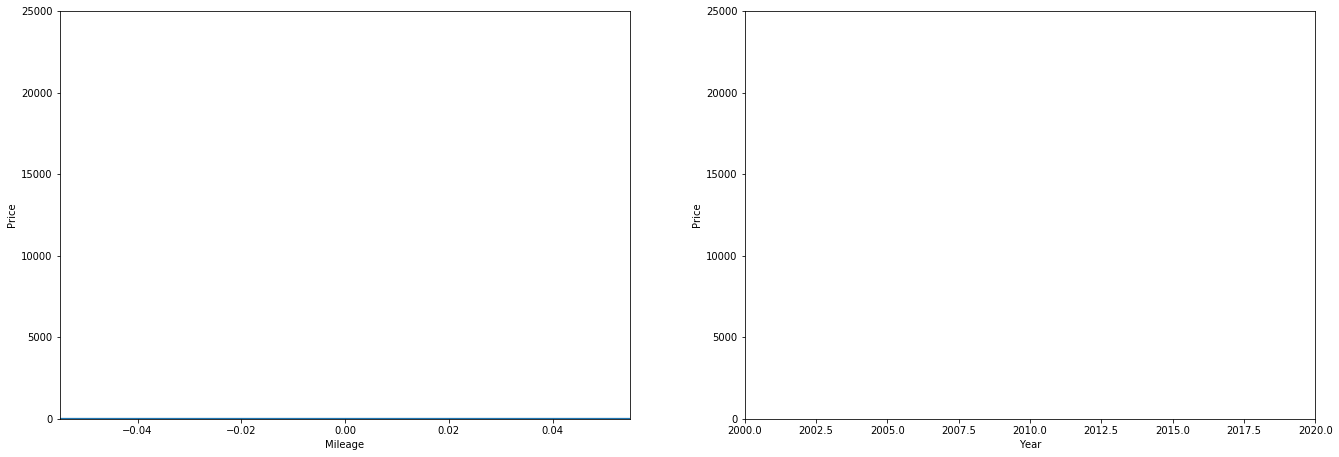

Plymouth
	2 cars with values > 23000
	0 cars with values < 23000


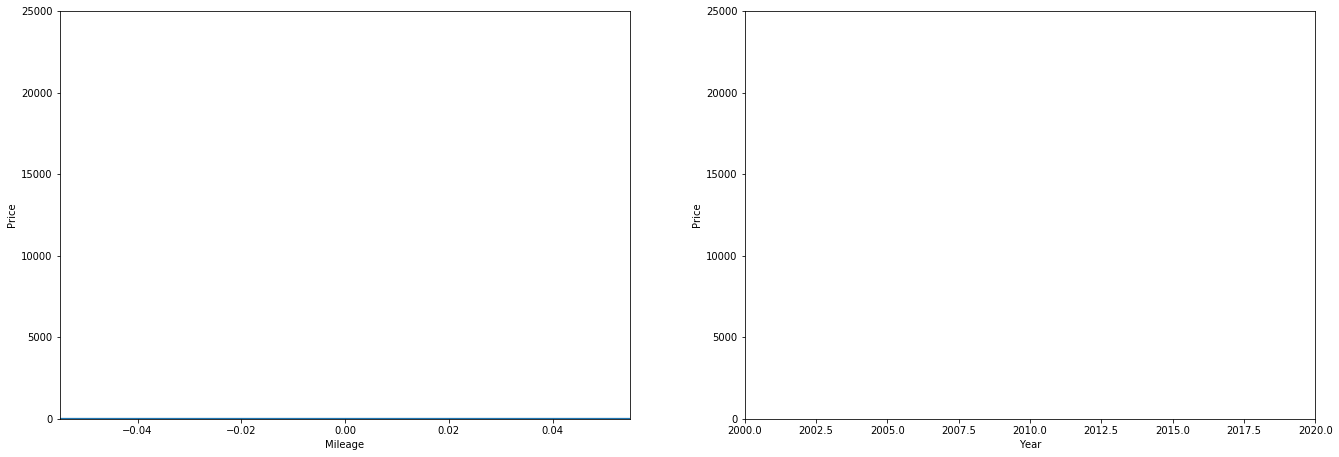

Studebaker
	0 cars with values > 23000
	1 cars with values < 23000


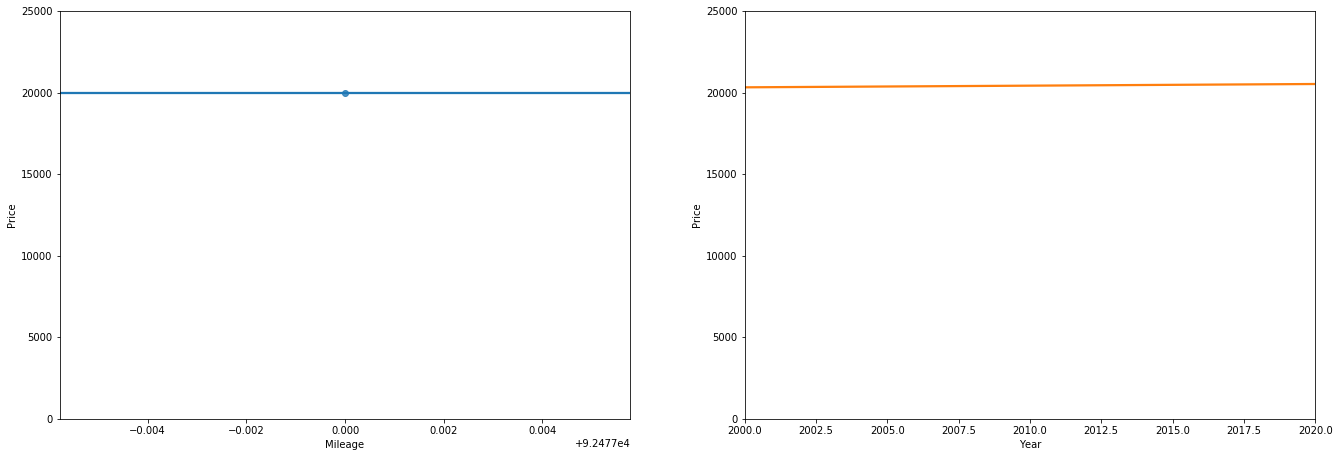

American
	1 cars with values > 23000
	0 cars with values < 23000


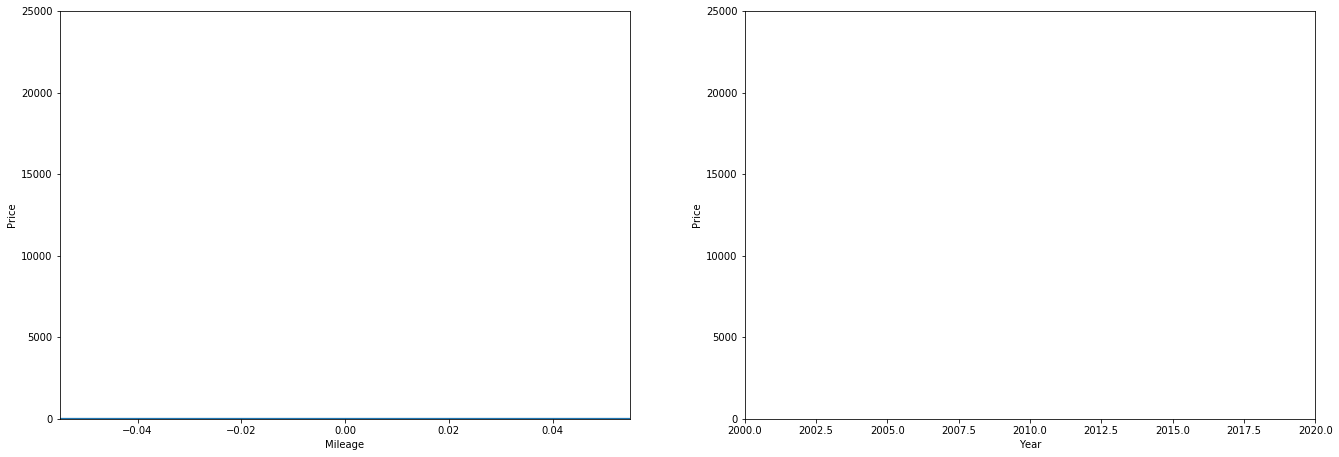

DeTomaso
	1 cars with values > 23000
	0 cars with values < 23000


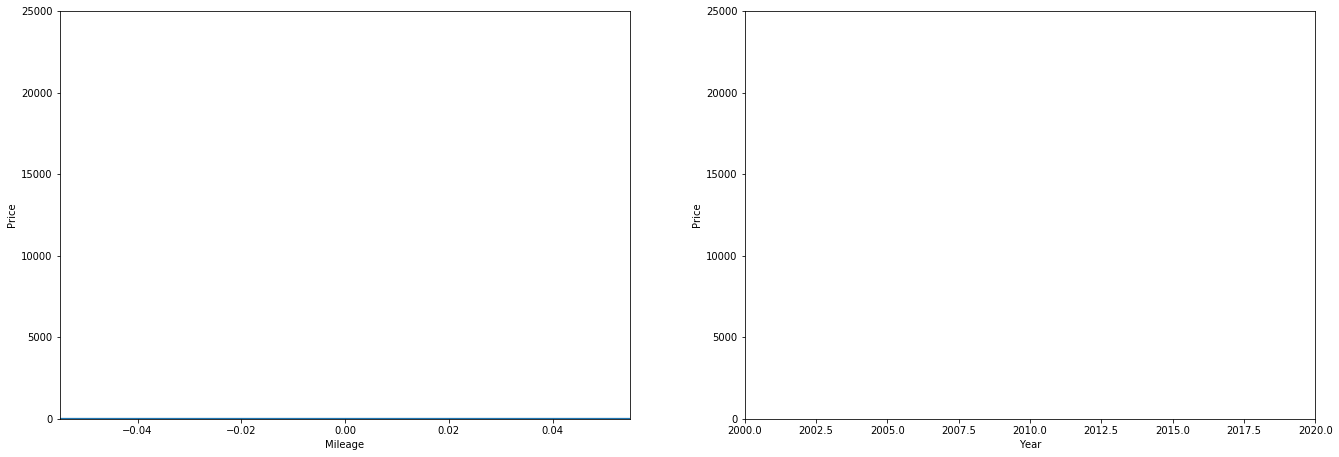

MG
	0 cars with values > 23000
	67 cars with values < 23000


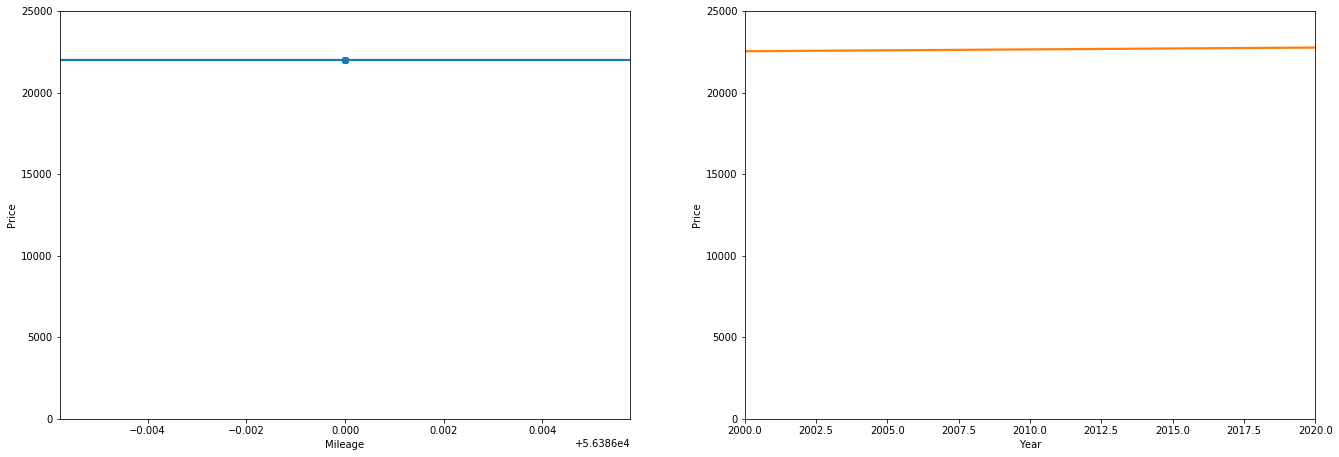

In [18]:
for make in makes:
    print(f'{make}')
    print(f'\t{len(cars[(cars["Make"] == make) & (cars["Price"] >= 23000)])} cars with values > 23000')
    print(f'\t{len(cars[(cars["Make"] == make) & (cars["Price"] < 23000)])} cars with values < 23000')
#     try:
    temp_df = cars[(cars['Make'] == make) & (cars['Price'] < 23000)][['Price', 'Mileage', 'Year']].sort_values(['Mileage'])
    fig = plt.figure(figsize=[22.5, 7.5])
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    sns.regplot(x='Mileage',y='Price',data=temp_df, fit_reg=True, ax=ax1)
    sns.regplot(x='Year',y='Price',data=temp_df, fit_reg=True, ax=ax2)

#     fig.title(make)
#     ax1.ylabel('Price ($)')
#     ax2.ylabel('Year')
    ax2.set_xlim([2000, 2020])
    ax2.set_ylim([0, 25000])
    ax1.set_ylim([0, 25000])
    plt.show()
#     except:
#           print('\tCan\'t afford any of these.')

In [20]:
for make in ['Subaru']:
    print(f'{make}')
    print(f'\t{len(cars[(cars["Make"] == make) & (cars["Price"] >= 23000)])} cars with values > 23000')
    print(f'\t{len(cars[(cars["Make"] == make) & (cars["Price"] < 23000)])} cars with values < 23000')
#     try:
    temp_df = cars[(cars['Make'] == make) & (cars['Price'] < 23000)][['Price', 'Mileage', 'Year']].sort_values(['Mileage'])
    print(temp_df.describe())

Subaru
	10 cars with values > 23000
	110 cars with values < 23000
              Price        Mileage         Year
count    110.000000     110.000000   110.000000
mean   18280.427273   45564.909091  2015.463636
std     2420.369331   17943.127423     2.364405
min     6995.000000    2215.000000  1994.000000
25%    16996.000000   46646.750000  2016.000000
50%    19499.000000   47174.000000  2016.000000
75%    19499.000000   47174.000000  2016.000000
max    22177.000000  129093.000000  2018.000000


In [23]:
subaru = cars[(cars['Make'] == 'Subaru') & (cars['Price'] < 23000)].sort_values(['Mileage'])

In [36]:
subaru.head()

,StockType,Title,Exterior,Interior,Transmission,Drivetrain,Price,Mileage,Year,Make,Model,ext_code,int_code,Automatic,Used
2140,USED,2018 Subaru BRZ Limited,White,Black,Automatic,RWD,21600,2215.0,2018,Subaru,BRZ Limited,3,0,1,1
472,USED,2018 Subaru BRZ Limited,Black,Black,Automatic,RWD,18999,2685.0,2018,Subaru,BRZ Limited,2,0,1,1
860,USED,2018 Subaru BRZ Limited,Gray,Black,Automatic,RWD,19199,8501.0,2018,Subaru,BRZ Limited,0,0,1,1
169,USED,2018 Subaru BRZ Limited,Red,Black,Automatic,RWD,17995,9269.0,2018,Subaru,BRZ Limited,6,0,1,1
2594,USED,2013 Subaru BRZ Limited,Blue,Gray,Automatic,RWD,16849,10877.0,2013,Subaru,BRZ Limited,1,2,1,1


In [27]:
subaru.Model.unique()

array(['BRZ Limited', 'BRZ Premium', 'BRZ Series.Blue',
       'BRZ Series.HyperBlue'], dtype=object)

In [26]:
subaru = subaru[subaru.Model.str.contains('BRZ')]

In [28]:
subaru.Transmission.unique()

array(['Automatic', 'Manual'], dtype=object)

In [29]:
subaru['Automatic'] = subaru['Transmission'].apply(lambda x: 1 if x == 'Automatic' else 0)

In [30]:
subaru.Exterior.unique()

array(['White', 'Black', 'Gray', 'Red', 'Blue', 'Silver'], dtype=object)

In [31]:
subaru.Interior.unique()

array(['Black', 'Gray'], dtype=object)

In [40]:
int_dummy = pd.get_dummies(subaru.Interior)
ext_dummy = pd.get_dummies(subaru.Exterior)
year_dummy = pd.get_dummies(subaru_clean.Year)

In [39]:
subaru.Year.unique()

array([2018, 2013, 2016, 2017, 2015, 2014], dtype=int64)

In [35]:
subaru['Used'] = subaru['StockType'].apply(lambda x: 1 if x == 'USED' else 0)

In [41]:
subaru_clean = pd.concat([subaru[['Price', 'Mileage', 'Automatic', 'Used']], year_dummy, int_dummy, ext_dummy], axis=1)

In [71]:
subaru_clean.head()

,Price,Mileage,Automatic,Used,2013,2014,2015,2016,2017,2018,Black,Gray,Black,Blue,Gray,Red,Silver,White,Price_scaled,Mileage_scaled
2140,21600,2215.0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1.479933,-2.642229
472,18999,2685.0,1,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0.283023,-2.613067
860,19199,8501.0,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0.375058,-2.252195
169,17995,9269.0,1,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,-0.178990,-2.204542
2594,16849,10877.0,1,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,-0.706349,-2.104769


In [47]:
subaru_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109 entries, 2140 to 1624
Data columns (total 18 columns):
Price        109 non-null int64
Mileage      109 non-null float64
Automatic    109 non-null int64
Used         109 non-null int64
2013         109 non-null uint8
2014         109 non-null uint8
2015         109 non-null uint8
2016         109 non-null uint8
2017         109 non-null uint8
2018         109 non-null uint8
Black        109 non-null uint8
Gray         109 non-null uint8
Black        109 non-null uint8
Blue         109 non-null uint8
Gray         109 non-null uint8
Red          109 non-null uint8
Silver       109 non-null uint8
White        109 non-null uint8
dtypes: float64(1), int64(3), uint8(14)
memory usage: 5.7 KB


In [69]:
def scale_feature(df, feature):
    mean = df[feature].mean()
    std = df[feature].std()
    df[feature + '_scaled'] = df[feature].apply(lambda x: (x - mean) / std)
    return mean, std

def unscale_feature(df, feature, mean, std):
    mean = df[feature].mean()
    std = df[feature].std()
    df[feature + '_unscaled'] = df[feature].apply(lambda x: (x * std) + mean)
    return mean, std

In [49]:
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split

In [70]:
price_mean, price_std = scale_feature(subaru_clean, 'Price')
mile_mean, mile_std = scale_feature(subaru_clean, 'Mileage')

In [81]:
d_cols = list(subaru_clean.columns[2:-2]) + [subaru_clean.columns[-1]]

In [82]:
X = subaru_clean[d_cols].to_numpy()

In [87]:
Y = subaru_clean['Price_scaled'].to_numpy()

In [88]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.5)

In [90]:
svreg = svm.SVR(gamma='auto')
svreg.fit(X_train, Y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [91]:
y_pred = svreg.predict(X_test)

In [92]:
import sklearn.metrics as metrics

In [94]:
metrics.r2_score(Y_test, y_pred)

0.6608758552475369

In [95]:
obs = range(0, len(Y_test))

In [97]:
Y_test_scaled = (Y_test * price_std) + price_mean
y_pred_scaled = (y_pred * price_std) + price_mean

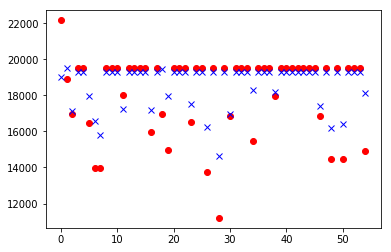

In [98]:
plt.plot(obs, Y_test_scaled, 'ro', label='True')
plt.plot(obs, y_pred_scaled, 'bx', label='Prediction')
plt.show()